# Local video

In [2]:
# %matplotlib widget
%load_ext autoreload
%autoreload 2
import os
import sys
sys.path.append("/home/ipausers/lin/Desktop/AMF/AMFtrack")
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
import random
import numpy as np
import json
import imageio
import logging
import cv2
from skimage.measure import profile_line
from amftrack.pipeline.functions.image_processing.experiment_class_surf import *
from amftrack.pipeline.functions.image_processing.experiment_util import *
from amftrack.util.sys import *
from amftrack.util.plot import *
from amftrack.util.geometry import *
from amftrack.util.image_analysis import *
from amftrack.pipeline.functions.image_processing.extract_width_fun import *
sys.path.append("/home/ipausers/lin/Desktop/Kai/Graduation-Project")
from models.config import *
from models.video import *
from models.model import *
from multiprocessing import Process,Manager
from threading import Thread

KeyboardInterrupt: 

## Unzip file

In [38]:
dropbox = "/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai"
directory = os.path.join(dropbox,"0217extract","1045_20220504/")
folder = os.listdir(directory)
folder.sort()
folder

['20220504_1900_Plate02',
 '20220505_0100_Plate02',
 '20220506_0100_Plate02',
 '20220507_0147_Plate02',
 '20220508_0147_Plate02',
 '20220509_0159_Plate02',
 '20220510_0136_Plate02',
 '20220511_0007_Plate02',
 '20220512_0104_Plate02',
 '20220513_0146_Plate02',
 '20220514_0149_Plate02',
 '20220515_0149_Plate02',
 '20220516_0150_Plate02',
 '20220517_0011_Plate02',
 '20220518_0050_Plate02',
 '20220519_1410_Plate02',
 '20220520_0126_Plate02',
 '20220521_0051_Plate02',
 '20220523_1127_Plate02',
 '20220524_0134_Plate02',
 '20220525_0152_Plate02',
 '20220531_2022_Plate25',
 '20220601_0422_Plate25',
 '20220603_0028_Plate25',
 '20220607_1440_Plate25',
 '20220608_0240_Plate25',
 '20220609_0208_Plate25',
 '20220611_0008_Plate25',
 '20220612_0008_Plate25',
 '20220613_0008_Plate25',
 '20220614_0718_Plate25',
 '20220615_0524_Plate25',
 '20220616_0723_Plate25',
 '20220617_0403_Plate25',
 '20220618_0206_Plate25',
 '20220619_0506_Plate25',
 '20220620_0506_Plate25',
 '20220621_0916_Plate25']

In [ ]:
folder_name = "Analysis"
file_name = "Analysis.zip"
# folder_name = "Img"
# file_name = "Img.zip"
for i in folder[:-2]:
    folder_path = os.path.join(directory,i)
    make_folder_path = os.path.join(folder_path, folder_name)
    move_file_path = os.path.join(folder_path, file_name)
    unzip_file_path = os.path.join(folder_path,folder_name,file_name)
    os.mkdir(make_folder_path)
    shutil.move(move_file_path, make_folder_path)
    with zipfile.ZipFile(unzip_file_path, 'r') as zip_ref:
        zip_ref.extractall(make_folder_path)
    os.remove(unzip_file_path)

In [46]:
folder_name = "Img"
file_name = "Img.zip"
for i in folder[:-2]:
    folder_path = os.path.join(directory,i)
    make_folder_path = os.path.join(folder_path, folder_name)
    move_file_path = os.path.join(folder_path, file_name)
    unzip_file_path = os.path.join(folder_path,folder_name,file_name)
    os.mkdir(make_folder_path)
    shutil.move(move_file_path, make_folder_path)
    with zipfile.ZipFile(unzip_file_path, 'r') as zip_ref:
        zip_ref.extractall(make_folder_path)
    os.remove(unzip_file_path)

FileExistsError: [Errno 17] File exists: '/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai/0217extract/1045_20220504/20220621_0916_Plate25/Img'

In [ ]:
def get_extract_file_path(path, folder_name, file_name):
    folder = os.listdir(path)
    folder.sort()
    make_folder_path_list,move_file_path_list,unzip_file_path_list = [],[],[]
    for i in folder:
        folder_path = os.path.join(path,i)
        make_folder_path = os.path.join(folder_path, folder_name)
        move_file_path = os.path.join(folder_path, file_name)
        unzip_file_path = os.path.join(folder_path,folder_name,file_name)
        make_folder_path_list.append(make_folder_path)
        move_file_path_list.append(move_file_path)
        unzip_file_path_list.append(unzip_file_path)
    return make_folder_path_list,move_file_path_list,unzip_file_path_list

def extract_file(make_folder_path,move_file_path,unzip_file_path):
    os.mkdir(make_folder_path)
    shutil.move(move_file_path, make_folder_path)
    with zipfile.ZipFile(unzip_file_path, 'r') as zip_ref:
        zip_ref.extractall(make_folder_path)
    os.remove(unzip_file_path)


In [ ]:
folder_name = "Img"
file_name = "Img.zip"
make_folder_path_list,move_file_path_list,unzip_file_path_list = get_extract_file_path(directory, folder_name, file_name)

In [ ]:
collect=[]
manager = Manager()
return_dict = manager.dict()
for i in range(len(folder)):
    p = Process(target=extract_file, args=(make_folder_path_list[i],move_file_path_list[i],unzip_file_path_list[i]))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

## Video creating

In [ ]:
# dropbox = "/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai"
# directory = os.path.join(dropbox,"1045_20220504/")
directory = os.path.join(storage_path,"video","1045_20220504/")
update_plate_info(directory)
save_img_path = directory+"video_image/"
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()
save_img_path

In [ ]:
file_names = folder_df.folder.tolist()
select = folder_df[(folder_df["folder"] == file_names[0])]

In [ ]:
exp = Experiment(directory)
exp.load(select)
exp.load_tile_information(0)

In [ ]:
%matplotlib widget
plot_full(exp,t=0,downsizing=20)

In [ ]:
get_edge_from_node_labels(exp, 0, 51,55)

In [ ]:
Node(51,exp)

In [ ]:
t = 0
G, pos = exp.nx_graph[t], exp.positions[t]

In [ ]:
G.edges(51)

In [ ]:
for file_name in file_names:
    select = folder_df[(folder_df["folder"] == file_name)]
    image_for_video(directory, file_name,select,"1045",[[20500, 23800], [20800,24300]], save_img_path = save_img_path,downsizing=1)

In [ ]:
def image_for_video(file_name:str,select_df):
    region_size = [[20500, 23800], [20800,24300]]
    exp = Experiment(directory)
    exp.load(select_df)
    exp.load_tile_information(0)
    plot_full(exp,t=0,downsizing=1,region = region_size,save_path= os.path.join(save_img_path,file_name+".png"))
    del exp
    plt.clf()
    return print(f'the mission for {file_name} is completed')

In [ ]:
collect=[]
for i in range(len(file_names)):
    p = Process(target=image_for_video, args=(file_names[i],folder_df[(folder_df["folder"] == file_names[i])]))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

In [ ]:
img_name = os.listdir(save_img_path)
img_name.sort()
img_name = img_name[1:]

In [ ]:
img_to_video(img_name,save_img_path,"width_growing_pos16.mp4")

## extract_width

In [33]:
directory = os.path.join(dropbox,"1045_20220504/")
update_plate_info(directory)
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()

analysed:   0%|          | 0/196 [00:00<?, ?it/s]

In [34]:
model = load_model(model_path,"BO_without_crop_best_model")
f_profiles = lambda edge: extract_section_profiles_for_edge(exp, 0, edge, resolution=5, offset=4, step=3,target_length=120)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [35]:
from multiprocessing import Manager
exp = Experiment(directory)
def get_edge_from_node(index,select, node_dict):
    exp.load(select)
    exp.load_tile_information(0)
    t = 0
    G, pos = exp.nx_graph[t], exp.positions[t]
    node_dict[index] = list(G.edges(51))[0]
    return node_dict

# manager = Manager()
# node_dict = manager.dict()
# collect=[]
# for i in range(len(file_names)):
#     select = folder_df[(folder_df["folder"] == file_names[i])]
#     p = Process(target=get_edge_from_node, args=(i,select,node_dict))
#     p.start()
#     collect.append(p)
# for process in collect:
#     process.join()

In [ ]:
node_dict = {}
for i in range(len(file_names)):
    print(i)
    select = folder_df[(folder_df["folder"] == file_names[i])]
    get_edge_from_node(i,select,node_dict)

0
2022-05-04 19:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


1
2022-05-04 21:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2
2022-05-04 23:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


3
2022-05-05 01:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


4
2022-05-05 03:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


5
2022-05-05 05:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


6
2022-05-05 07:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


7
2022-05-05 09:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


8
2022-05-05 11:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


9
2022-05-05 13:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


10
2022-05-05 15:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


11
2022-05-05 17:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


12
2022-05-05 19:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


13
2022-05-05 21:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


14
2022-05-06 01:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


15
2022-05-06 03:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


16
2022-05-06 05:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


17
2022-05-06 07:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


18
2022-05-06 09:00:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


In [ ]:
exp = Experiment(directory)
def get_slices_from_node(index,select,slice_dict):
    exp.load(select)
    exp.load_tile_information(0)
    node1, node2 = node_dict[index]
    slices, coords1, coords2 = f_profiles(get_edge_from_node_labels(exp, 0, node1,node2))
    slice_dict[index] = slices
    print(file_names[index])

collect=[]
manager = Manager()
slice_dict = manager.dict()
for i in range(len(file_names)):
    select = folder_df[(folder_df["folder"] == file_names[i])]
    p = Process(target=get_slices_from_node, args=(i,select,slice_dict))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

In [ ]:
for index,value in slice_dict.items():
    print(file_names[index],value)

In [ ]:
len(slice_dict)

In [ ]:
manager = Manager()
width_dict = manager.dict()
collect = []
def get_width_from_slices(index,width_dict):
    predict_value = model.predict(slice_dict[index],verbose=0)
    width_dict[index] = predict_value

for i in range(len(file_names)):
    p = Process(target=get_width_from_slices, args=(i,width_dict))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

In [ ]:
width_dict = {}
for i in range(len(file_names)):
    try:
        get_width_from_slices(i,width_dict)
    except Exception:
        print("Cannot extract "+file_names[i])

In [ ]:
len(width_dict)

In [ ]:
def get_median_index_from_width(index,width_dict,median_index_dict):
    width = width_dict[index]
    median = np.median(width)
    if median > 1e5:
        median = np.median(np.delete(width, np.where(width == median)))
    median_index = np.where(width == median)[0]
    if len(median_index) == 0:
        median_index = (np.abs(width - median)).argmin()
    else:
        median_index = median_index[0]
    median_index_dict[index] = median_index
    width_dict[index] = median

In [ ]:
median_index_dict = {}
for i in range(len(file_names)):
    try:
        get_median_index_from_width(i,width_dict,median_index_dict)
    except Exception:
        pass

In [ ]:
len(median_index_dict)

In [ ]:
def get_slice_from_median_index(index,median_index_dict,slice_dict,median_slice_dict):
    median_index = median_index_dict[index]
    slices = slice_dict[index]
    median_slice_dict[index] = slices[median_index]

In [ ]:
median_slice_dict = {}
for i in range(len(file_names)):
    try:
        get_slice_from_median_index(i,median_index_dict,slice_dict,median_slice_dict)
    except Exception:
        pass

In [ ]:
collect

In [ ]:
%matplotlib widget
collect = []
save_width_path = os.path.join(storage_path,'video',"1045_20220504","width_image/")
for i in range(len(file_names)):
    try:
        collect.append(width_dict[i])
        plt.figure(figsize=(4, 6), dpi=80)
        plt.plot(collect,"-o")
        # # plt.xticks(np.arange(0,len(hr_list),1),labels=hr_list,rotation = 90)
        plt.rcParams.update({'font.size': 8})
        plt.ylim(4.5,15)
        plt.xlim(-1,70)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(fname= save_width_path+file_names[i]+"_width.png")
        plt.clf()
    except:
        pass

In [ ]:
width_name = os.listdir(save_width_path)
width_name.sort()
width_name = width_name[1:]

In [ ]:
img_to_video(width_name,save_width_path,"width_growing.mp4")

In [ ]:
def img_to_video(img_files:list, save_img_path:str,save_file_name:str,choose_type = "normal",width_files=None,save_width_path=None,width_value_list=None):
    img_path = [os.path.join(save_img_path,file) for file in img_files]
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in img_path]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list] 
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    imgs = [cv2.imread(path) for path in img_path]
    # for index,img in enumerate(imgs):
    #     pos = img.shape[0]//10, img.shape[1]//10
    #     cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 0),thickness=3)
    #     if choose_type == "combine":
    #         width_path = [os.path.join(save_width_path,file) for file in width_files]
    #         widths = [cv2.imread(path) for path in width_path]
    #         width = widths[index]
    #         img[img.shape[0]-width.shape[0]:img.shape[0], img.shape[1]-width.shape[1]:img.shape[1]] = width
    #         pos2 = img.shape[1]-width.shape[1],img.shape[0]-width.shape[0]
    #         cv2.putText(img=img, text=str(np.around(width_value_list[index],1))+'um', org= pos2, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(255, 0, 0),thickness=2)
    imageio.mimsave(os.path.join(save_img_path,save_file_name),imgs)
    return imgs

In [ ]:
median_slice_dict

In [ ]:
%matplotlib widget
save_feature_path = os.path.join(storage_path,'video',"1045_20220504","feature_image/")
for i in range(len(file_names)):
    try:
        plt.plot(median_slice_dict[i])
        # plt.figure(figsize=(4, 6), dpi=80)
        plt.rcParams.update({'font.size': 8})
        plt.tight_layout()
        plt.savefig(fname= save_feature_path+file_names[i]+"_feature.png")
        plt.clf()
    except:
        pass

In [ ]:
feature_name = os.listdir(save_feature_path)
feature_name.sort()
feature_name = feature_name[1:]


In [ ]:
img_to_video(feature_name,save_feature_path,"width_growing.mp4")

## test pipeline

In [2]:
storage_path

'/home/ipausers/lin/Desktop/data/'

In [3]:
directory = os.path.join(dropbox,"1045_20220504/")
# directory = os.path.join(storage_path,"video","1045_20220504/")
update_plate_info(directory)
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()
model = load_model(model_path,"BO_without_crop_best_model")

analysed:   0%|          | 0/196 [00:00<?, ?it/s]

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

### width

In [ ]:
node_dict, slice_dict, width_dict, median_index_dict = {},{},{},{}
node = 51
for index in range(len(file_names)):
    exp = Experiment(directory)
    select = folder_df[(folder_df["folder"] == file_names[index])]
    exp.load(select)
    exp.load_tile_information(0)
    get_edge_from_node(index,node_dict,node,exp)
    get_slices_from_node(index,slice_dict,node_dict,exp,target_length=120)
    get_width_from_slices(index,model,slice_dict,width_dict)
    get_median_index_from_width(index,width_dict,median_index_dict)

2022-05-11 12:43:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-11 15:04:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-11 17:04:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-11 19:04:00


In [3]:
data_width_label = ['20220511_1243_Plate02' , '20220511_1504_Plate02', '20220511_1704_Plate02',
 '20220511_1904_Plate02' , '20220511_2104_Plate02','20220511_2304_Plate02', 
 '20220512_0104_Plate02' ,'20220512_0304_Plate02', '20220512_0504_Plate02', 
 '20220512_0704_Plate02' ,'20220512_0904_Plate02', '20220512_1104_Plate02', 
 '20220512_1304_Plate02' ,'20220512_1504_Plate02', '20220512_1743_Plate02', 
 '20220512_1946_Plate02' ,'20220512_2146_Plate02', '20220512_2346_Plate02', 
 '20220513_0146_Plate02' ,'20220513_0546_Plate02', '20220513_0749_Plate02',
 '20220513_0949_Plate02' , '20220513_1149_Plate02','20220513_1349_Plate02', 
 '20220513_1549_Plate02' ,'20220513_1749_Plate02', '20220513_1949_Plate02',
 '20220513_2149_Plate02' , '20220513_2349_Plate02','20220514_0149_Plate02', 
 '20220514_0349_Plate02' , '20220514_0549_Plate02', '20220514_0749_Plate02',
 '20220514_0949_Plate02' , '20220514_1149_Plate02', '20220514_1349_Plate02', 
 '20220514_1549_Plate02' ,'20220514_1749_Plate02', '20220514_1949_Plate02', 
 '20220514_2149_Plate02' ,'20220514_2349_Plate02', '20220515_0149_Plate02', 
 '20220515_0349_Plate02' ,'20220515_0549_Plate02' ,'20220515_0749_Plate02' ,
 '20220515_0949_Plate02' ,'20220515_1149_Plate02' ,'20220515_1349_Plate02' ,
 '20220515_1549_Plate02' ,'20220515_1749_Plate02' ,'20220515_1950_Plate02' ,
 '20220515_2150_Plate02' ,'20220515_2350_Plate02' ,'20220516_0150_Plate02' ,
 '20220516_0350_Plate02' ,'20220516_0550_Plate02' ,'20220516_0752_Plate02' ,
 '20220516_0952_Plate02' ,'20220516_1152_Plate02' ,'20220516_1411_Plate02' ,
 '20220516_1811_Plate02' ,'20220516_2011_Plate02' ,'20220516_2211_Plate02' ]
data_width_value=[11.828784,12.972734,13.949188,13.649318,13.413254,13.685837,13.260126,
 13.039662,12.996105,13.296067,13.324498,13.447138,12.9597025,12.880415,
 12.969351,13.230528,13.147379,13.291662,12.973193,12.968024,12.906318,
 3.461729,3.5551429,13.7551365,13.109982,12.506494,3.5415368,12.348456,
 12.689597,3.7430315,3.1935143,3.7599578,3.8969903,3.6799626,3.4920273,
 3.6979284,3.546938,3.9516234,4.452442,4.9481726,3.7501273,3.6568213,
 3.8054216,13.115262 ,4.037614 ,4.32429 ,3.6714659 ,3.8595734 ,3.6179419 ,
 3.1284804 ,3.3146276 ,3.426096 ,3.27289 ,3.8215544 ,4.215638 ,3.6288366 ,
 3.6014144 ,3.6012435 ,4.076337 ,3.5263095 ,13.027108 ,3.57898 ,3.3932765 ,]

In [4]:
# dropbox
dropbox_width_value = [5.2975097 ,5.108846 ,5.187714 ,5.216663 ,5.279394 ,5.5470743 ,5.295464 ,5.4618864 ,5.390477 ,5.822842 ,6.60816 ,7.219164 ,7.6318793 ,8.264828 ,8.830468 ,9.075826 ,9.165726 ,9.087539 ,9.349606 ,9.970518 ,11.577235 ,11.29362 ,11.404742 ,11.4776745 ,10.637857 ,12.430767 ,13.160206 ,12.846468 ,12.09898 ,12.308514 ,12.695522 ,12.433025 ,13.473114 ,13.635719 ,13.169215 ,12.506348 ,12.638327 ,11.518881 ,13.390089 ,12.654648 ,12.597522 ,13.17301 ,12.663767 ,12.177008 ,13.020647 ,12.181702 ,12.057541 ,12.453825 ,12.195503 ,12.765166 ,12.083451 ,12.2785561 ,11.679253 ,12.643824 ,12.206112 ,12.775602 ,12.566845 ,12.00602 ,12.470588 ,13.159069 ,12.565542 ,13.279133 ,12.790187 ,12.156105 ,13.156838 ,12.74905 ,12.779576]
dropbox_width_label = ['20220504_1900_Plate02', '20220504_2100_Plate02', '20220504_2300_Plate02', '20220505_0100_Plate02', '20220505_0300_Plate02', '20220505_0500_Plate02', '20220505_0700_Plate02', '20220505_0900_Plate02', '20220505_1100_Plate02', '20220505_1300_Plate02', '20220505_1500_Plate02', '20220505_1700_Plate02', '20220505_1900_Plate02', '20220505_2100_Plate02', '20220506_0100_Plate02', '20220506_0300_Plate02', '20220506_0500_Plate02', '20220506_0700_Plate02', '20220506_0900_Plate02', '20220506_1100_Plate02', '20220506_1300_Plate02', '20220506_1500_Plate02', '20220506_2100_Plate02', '20220506_2347_Plate02', '20220507_0147_Plate02', '20220507_0347_Plate02', '20220507_0547_Plate02', '20220507_0947_Plate02', '20220507_1147_Plate02', '20220507_1747_Plate02', '20220507_1947_Plate02', '20220507_2147_Plate02', '20220507_2347_Plate02', '20220508_0147_Plate02', '20220508_0347_Plate02', '20220508_0547_Plate02', '20220508_0747_Plate02', '20220508_1147_Plate02', '20220508_1347_Plate02', '20220508_1759_Plate02', '20220508_1959_Plate02', '20220508_2159_Plate02', '20220508_2359_Plate02', '20220509_0159_Plate02', '20220509_0936_Plate02', '20220509_1136_Plate02', '20220509_1336_Plate02', '20220509_1536_Plate02', '20220509_1736_Plate02', '20220509_1936_Plate02', '20220509_2336_Plate02', '20220510_0136_Plate02', '20220510_0336_Plate02', '20220510_0536_Plate02', '20220510_0736_Plate02', '20220510_1150_Plate02', '20220510_1409_Plate02', '20220510_1608_Plate02', '20220510_1807_Plate02', '20220510_2007_Plate02', '20220510_2207_Plate02', '20220511_0007_Plate02', '20220511_0207_Plate02', '20220511_0407_Plate02', '20220511_0607_Plate02', '20220511_0807_Plate02', '20220511_1018_Plate02']

In [5]:
dropbox_width_value.extend(data_width_value)
dropbox_width_label.extend(data_width_label)

In [6]:
len(dropbox_width_label),len(dropbox_width_value)

(130, 130)

In [7]:
width_dict = {}
for i in range(len(dropbox_width_label)):
    width_dict[dropbox_width_label[i]] = dropbox_width_value[i]

In [8]:
for key,value in width_dict.items():
    print(key,value)

20220504_1900_Plate02 5.2975097
20220504_2100_Plate02 5.108846
20220504_2300_Plate02 5.187714
20220505_0100_Plate02 5.216663
20220505_0300_Plate02 5.279394
20220505_0500_Plate02 5.5470743
20220505_0700_Plate02 5.295464
20220505_0900_Plate02 5.4618864
20220505_1100_Plate02 5.390477
20220505_1300_Plate02 5.822842
20220505_1500_Plate02 6.60816
20220505_1700_Plate02 7.219164
20220505_1900_Plate02 7.6318793
20220505_2100_Plate02 8.264828
20220506_0100_Plate02 8.830468
20220506_0300_Plate02 9.075826
20220506_0500_Plate02 9.165726
20220506_0700_Plate02 9.087539
20220506_0900_Plate02 9.349606
20220506_1100_Plate02 9.970518
20220506_1300_Plate02 11.577235
20220506_1500_Plate02 11.29362
20220506_2100_Plate02 11.404742
20220506_2347_Plate02 11.4776745
20220507_0147_Plate02 10.637857
20220507_0347_Plate02 12.430767
20220507_0547_Plate02 13.160206
20220507_0947_Plate02 12.846468
20220507_1147_Plate02 12.09898
20220507_1747_Plate02 12.308514
20220507_1947_Plate02 12.695522
20220507_2147_Plate02 12.4

In [9]:
import collections
od = collections.OrderedDict(sorted(width_dict.items()))

In [170]:
len(intersection)

118

In [14]:
from datetime import datetime
collect_width = []
collect_time = []
for key, value in od.items():
    collect_width.append(value)
    collect_time.append(key)

In [67]:
date_list = ["".join(time.split("_")[:2]) for time in collect_time]
datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
diff_list = [(date - datetime_list[0]) for date in datetime_list] 
hr_list = [hr.seconds//3600+hr.days*24 for hr in diff_list] 

In [111]:
hr_list

[0,
 2,
 4,
 6,
 8,
 10,
 12,
 14,
 16,
 18,
 20,
 22,
 24,
 26,
 30,
 32,
 34,
 36,
 38,
 40,
 42,
 44,
 50,
 52,
 54,
 56,
 58,
 62,
 64,
 70,
 72,
 74,
 76,
 78,
 80,
 82,
 84,
 88,
 90,
 94,
 96,
 98,
 100,
 102,
 110,
 112,
 114,
 116,
 118,
 120,
 124,
 126,
 128,
 130,
 132,
 136,
 139,
 141,
 143,
 145,
 147,
 149,
 151,
 153,
 155,
 157,
 159,
 161,
 164,
 166,
 168,
 170,
 172,
 174,
 176,
 178,
 180,
 182,
 184,
 186,
 188,
 190,
 192,
 194,
 196,
 198,
 202,
 204,
 206,
 208,
 210,
 212,
 214,
 216,
 218,
 220,
 222,
 224,
 226,
 228,
 230,
 232,
 234,
 236,
 238,
 240,
 242,
 244,
 246,
 248,
 250,
 252,
 254,
 256,
 258,
 260,
 262,
 264,
 266,
 268,
 270,
 272,
 274,
 276,
 278,
 280,
 283,
 287,
 289,
 291]

In [79]:
len(hr_list[:50])

50

In [82]:
len(np.linspace(0,50,10))

10

In [105]:
len(np.arange(0,130,10))

13

In [108]:
len(collect_width[:50])

50

In [119]:
np.linspace(0,120,13)

array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
       110., 120.])

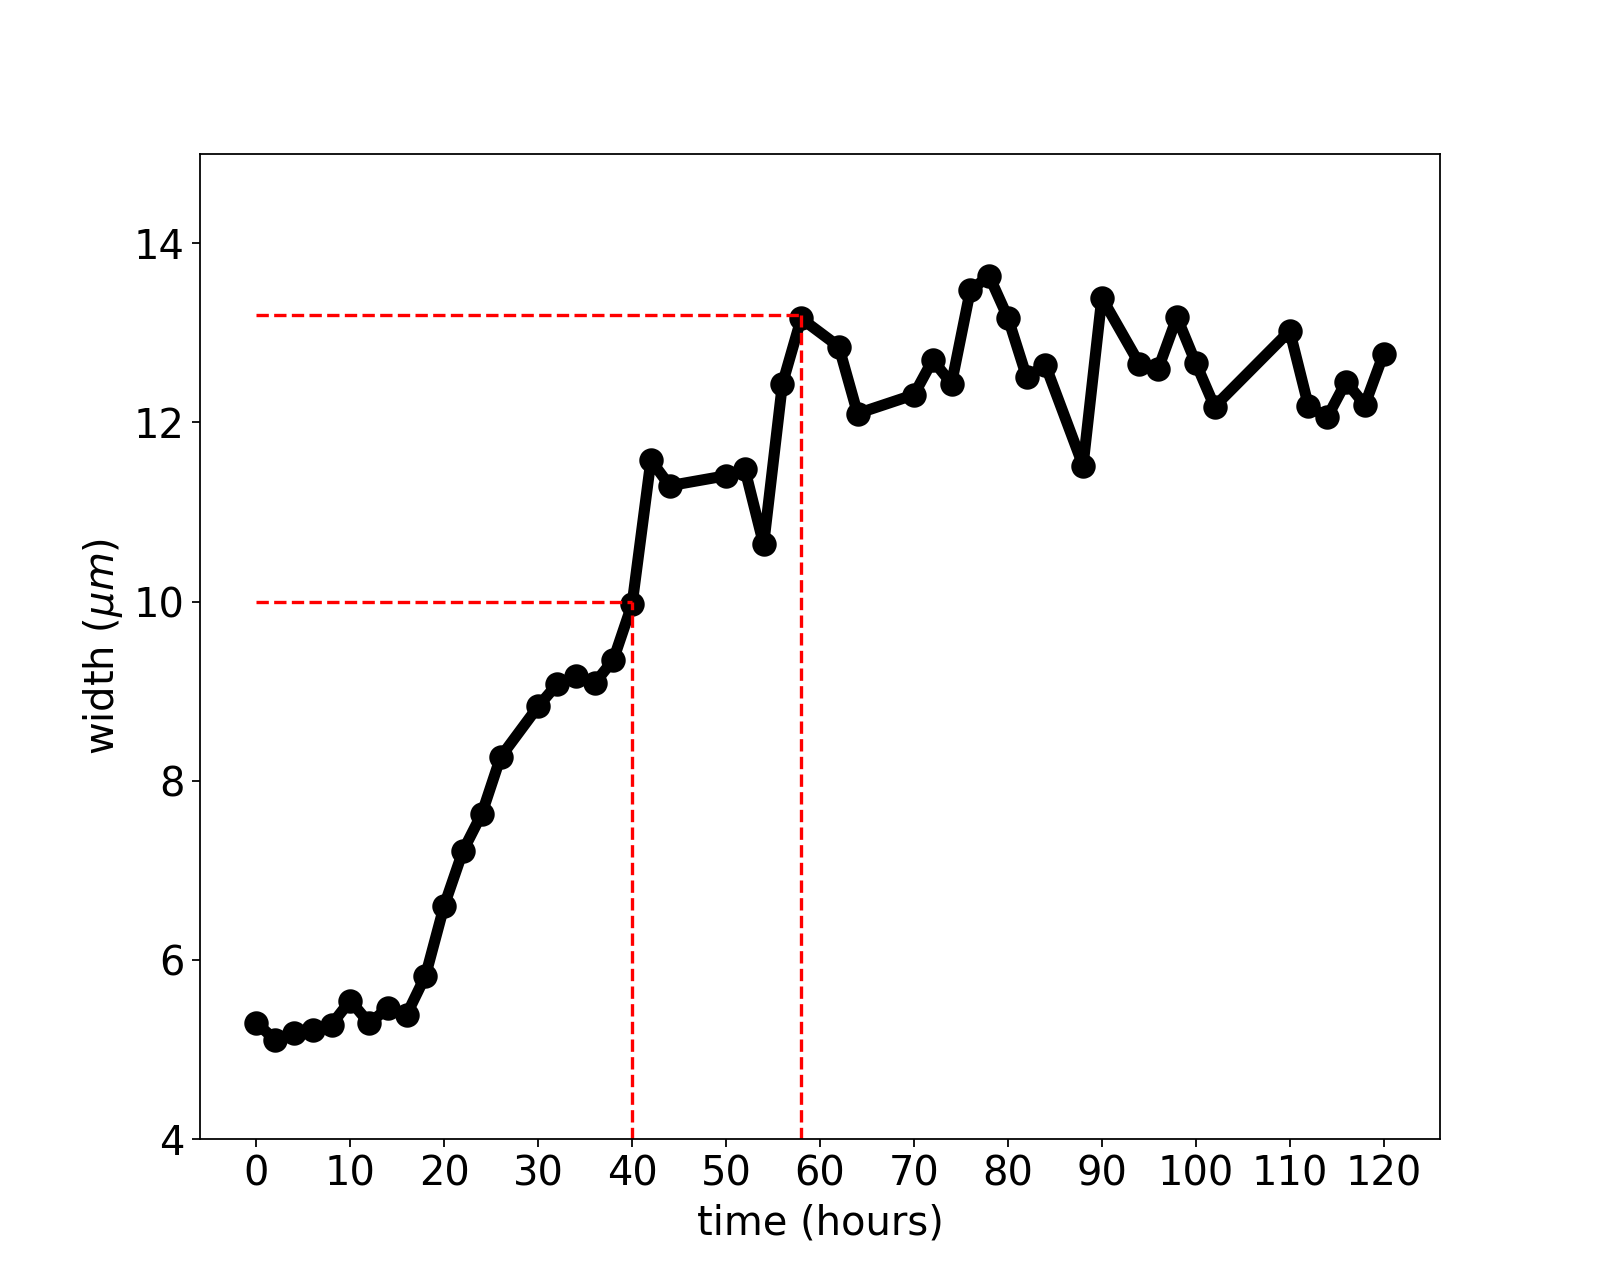

In [123]:
%matplotlib widget
plt.figure(figsize=(10, 8), dpi=160)
plt.plot(hr_list[:50],collect_width[:50],"-ok",linewidth=5,mew=5)
# plt.xticks(np.arange(0,len(hr_list[:50]),1),labels=hr_list[:50])
plt.xticks(np.linspace(0,120,13),labels=np.arange(0,130,10), fontsize=18)
plt.yticks(fontsize=18)
plt.ylim(4,15)
plt.ylabel("width ($\mathit{\mu m}$)", fontsize=18)
plt.xlabel("time (hours)", fontsize=18)
plt.hlines(y=10,xmin=0,xmax=40,ls="--",colors = "r")
plt.vlines(x=40,ymin=0,ymax=10,ls="--",colors='red')
plt.hlines(y=13.2,xmin=0,xmax=58,ls="--",colors='red')
plt.vlines(x=58,ymin=0,ymax=13.2,ls="--",colors='red')
# plt.title("Local width growing for plate1045 node51")
plt.savefig(fname= os.path.join(main_path,"notebook","plot_data","width distribution","1045_20220504_node51_width.png"))

In [11]:
%matplotlib widget
width = []
save_width_path = os.path.join(storage_path,'video',"1045_20220504","width_image/")
for i in range(len(od)):
    try:
        width.append(width_dict[intersection[i][:-4]])
        plt.figure(figsize=(4, 6), dpi=80)
        plt.plot(width,"-o")
        # # plt.xticks(np.arange(0,len(hr_list),1),labels=hr_list,rotation = 90)
        plt.rcParams.update({'font.size': 8})
        plt.ylim(5,15)
        plt.xlim(-2,85)
        plt.axis('off')
        plt.tight_layout()
        # plt.savefig(fname= save_width_path+intersection[i][:-4]+"_width.png")
        # plt.clf()
    except:
        print(f'cannot find {intersection[i][:-4]}')

OrderedDict([('20220504_1900_Plate02', 5.2975097),
             ('20220504_2100_Plate02', 5.108846),
             ('20220504_2300_Plate02', 5.187714),
             ('20220505_0100_Plate02', 5.216663),
             ('20220505_0300_Plate02', 5.279394),
             ('20220505_0500_Plate02', 5.5470743),
             ('20220505_0700_Plate02', 5.295464),
             ('20220505_0900_Plate02', 5.4618864),
             ('20220505_1100_Plate02', 5.390477),
             ('20220505_1300_Plate02', 5.822842),
             ('20220505_1500_Plate02', 6.60816),
             ('20220505_1700_Plate02', 7.219164),
             ('20220505_1900_Plate02', 7.6318793),
             ('20220505_2100_Plate02', 8.264828),
             ('20220506_0100_Plate02', 8.830468),
             ('20220506_0300_Plate02', 9.075826),
             ('20220506_0500_Plate02', 9.165726),
             ('20220506_0700_Plate02', 9.087539),
             ('20220506_0900_Plate02', 9.349606),
             ('20220506_1100_Plate02', 9.970518

In [ ]:
%matplotlib widget
width = []
save_width_path = os.path.join(storage_path,'video',"1045_20220504","width_image/")
for i in range(len(intersection[:80])):
    try:
        width.append(width_dict[intersection[i][:-4]])
        plt.figure(figsize=(4, 6), dpi=80)
        plt.plot(width,"-o")
        # # plt.xticks(np.arange(0,len(hr_list),1),labels=hr_list,rotation = 90)
        plt.rcParams.update({'font.size': 8})
        plt.ylim(5,15)
        plt.xlim(-2,85)
        plt.axis('off')
        plt.tight_layout()
        # plt.savefig(fname= save_width_path+intersection[i][:-4]+"_width.png")
        # plt.clf()
    except:
        print(f'cannot find {intersection[i][:-4]}')

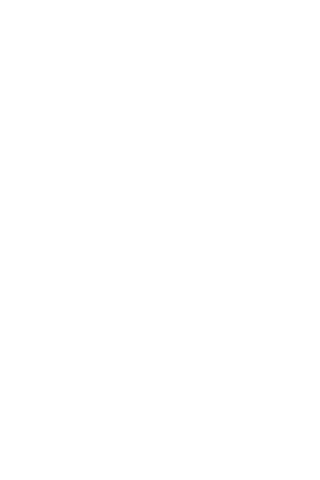

In [136]:
collect = []
save_width_path = os.path.join(storage_path,'video',"1045_20220504","width_image/")
i=0
collect.append(width_dict[intersection[i][:-4]])
plt.figure(figsize=(4, 6), dpi=80)
plt.plot(collect,"-o")
# # plt.xticks(np.arange(0,len(hr_list),1),labels=hr_list,rotation = 90)
plt.rcParams.update({'font.size': 8})
plt.ylim(3,15)
plt.xlim(-1,118)
plt.axis('off')
plt.tight_layout()
plt.savefig(fname= save_width_path+intersection[i][:-4]+"_width.png")
plt.clf()

/tmp/ipykernel_1411113/511729933.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(4, 6), dpi=80)


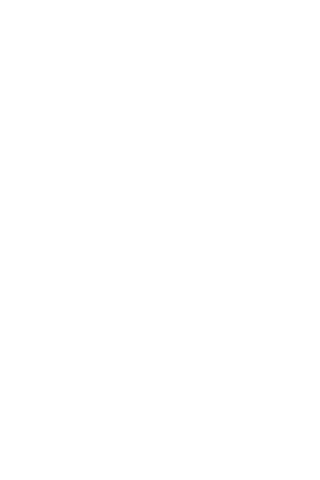

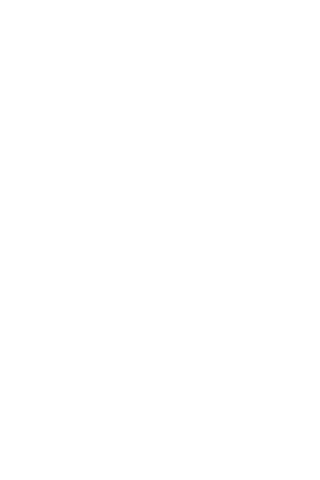

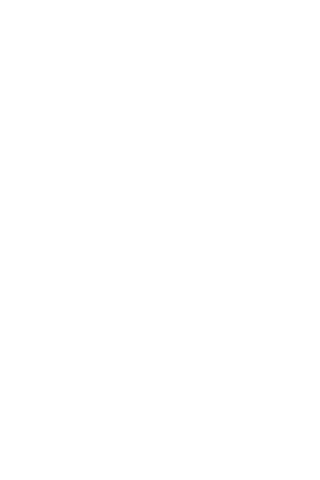

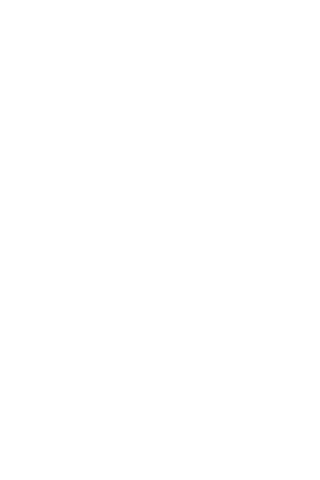

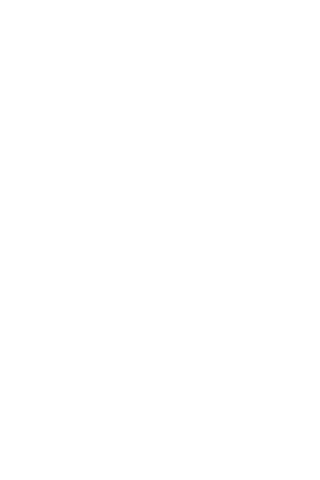

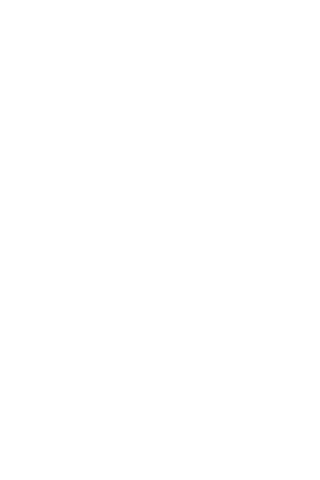

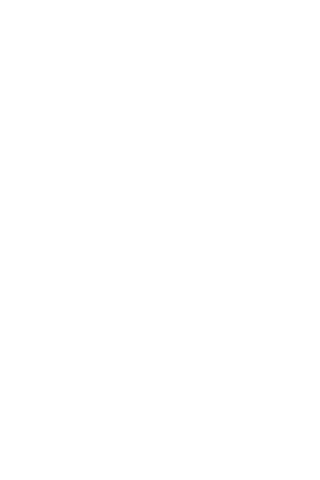

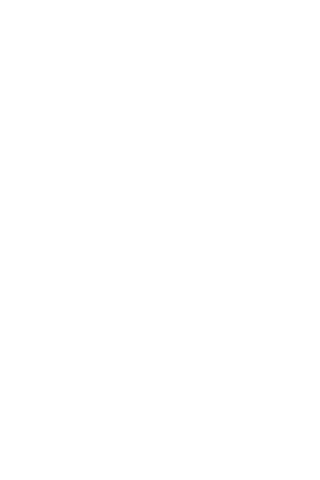

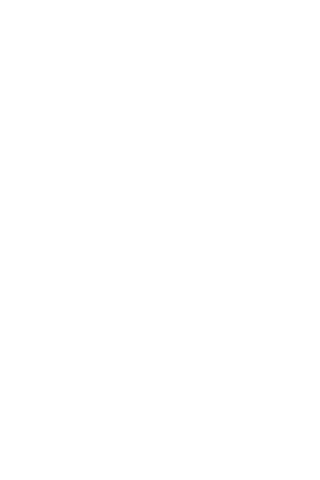

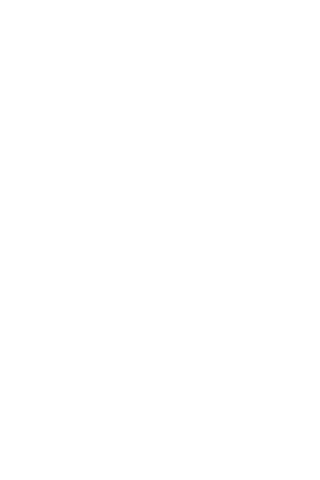

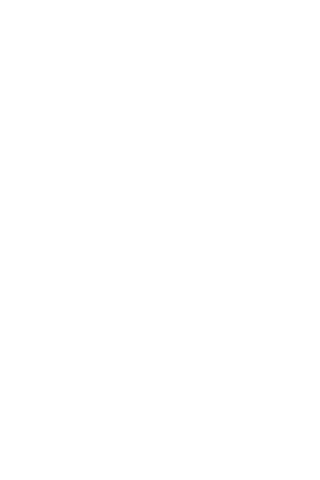

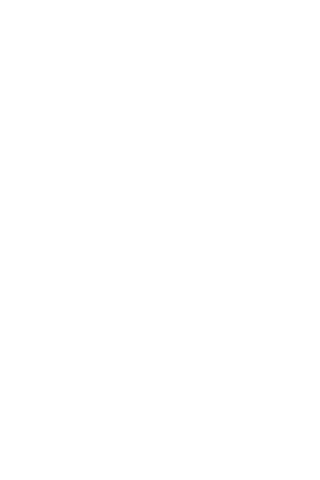

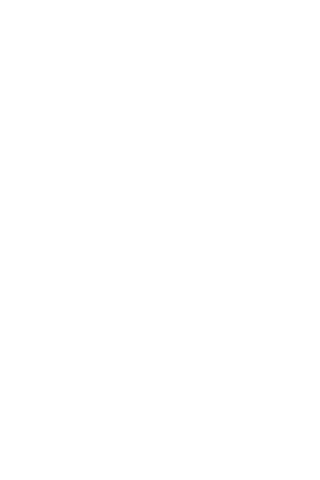

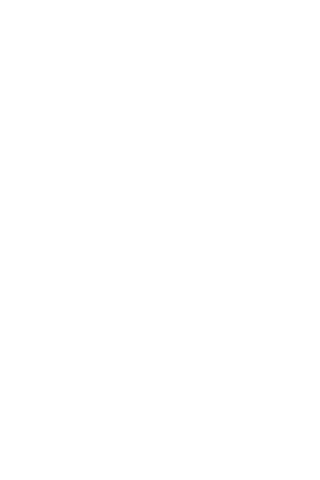

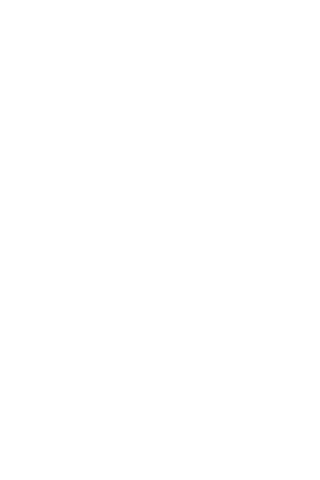

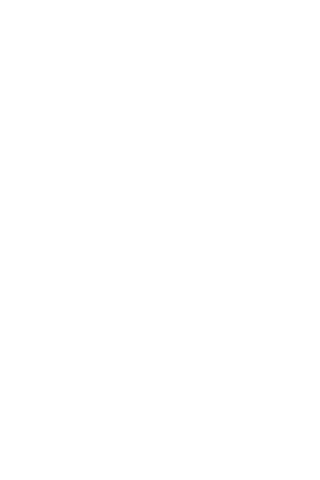

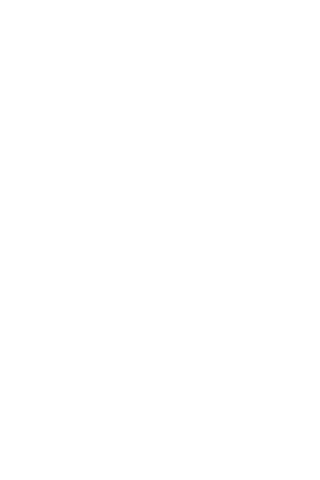

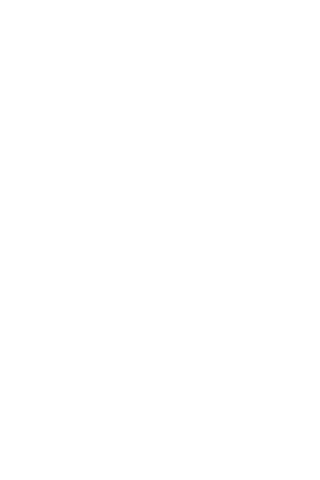

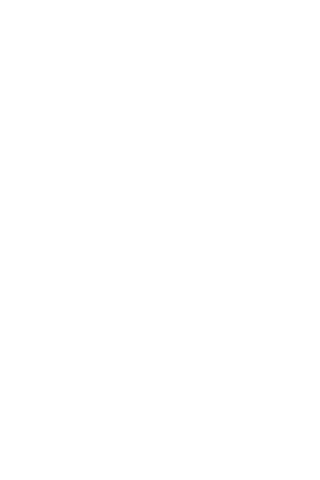

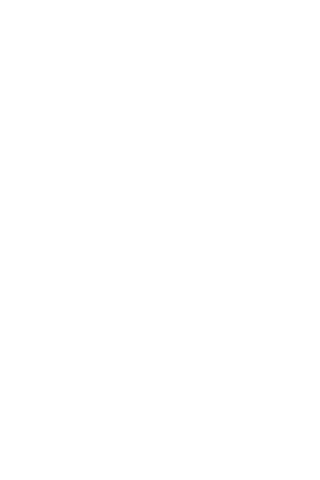

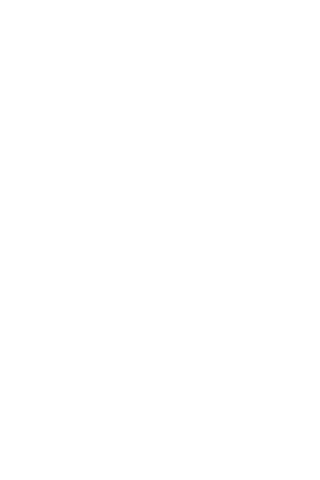

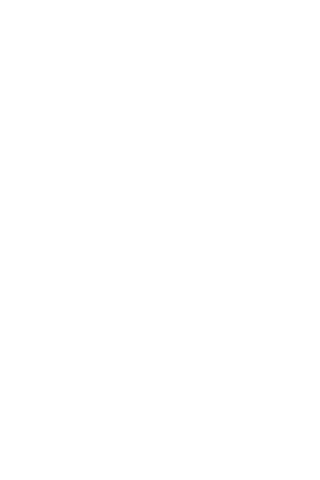

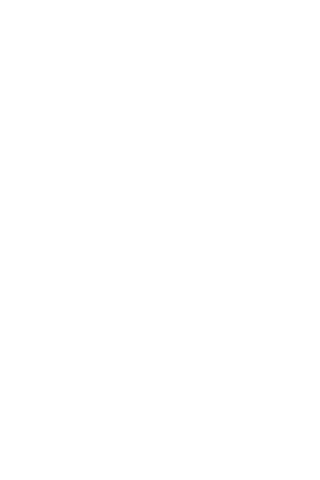

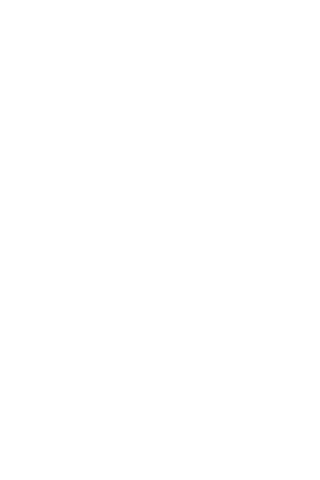

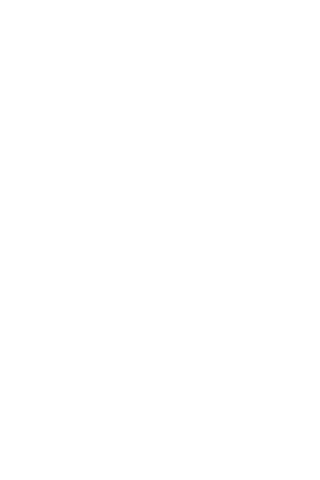

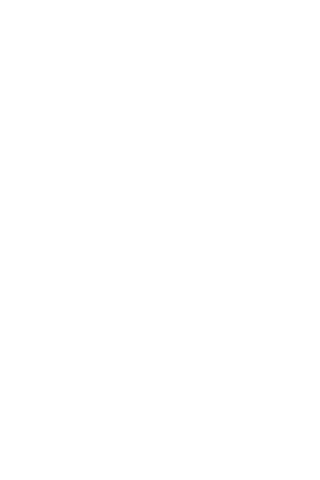

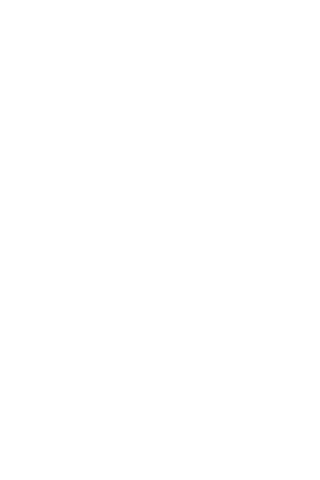

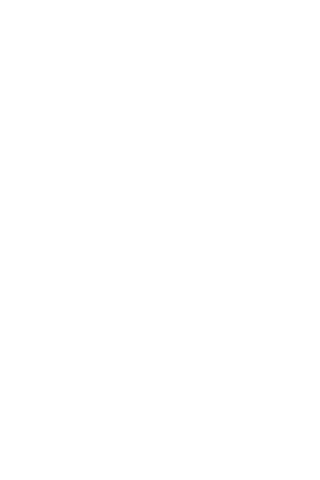

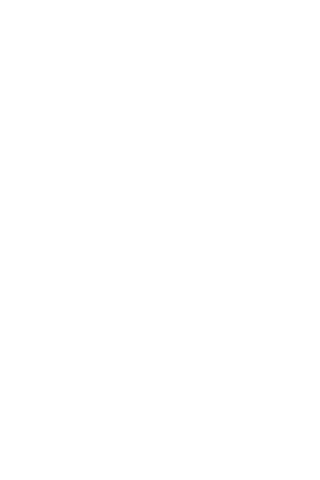

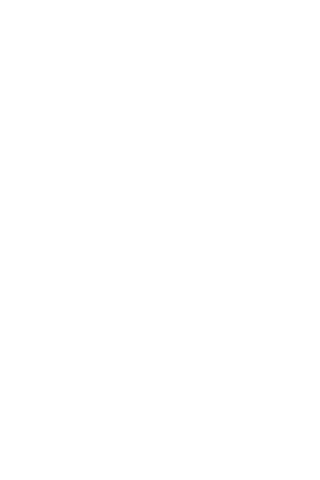

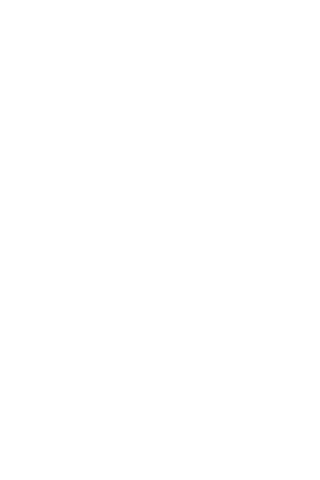

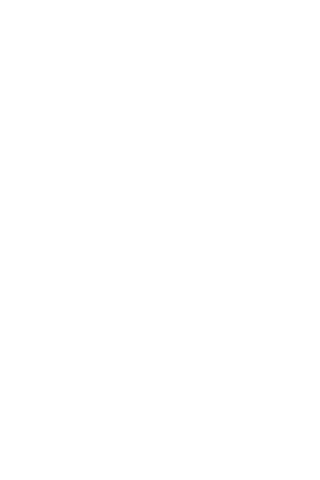

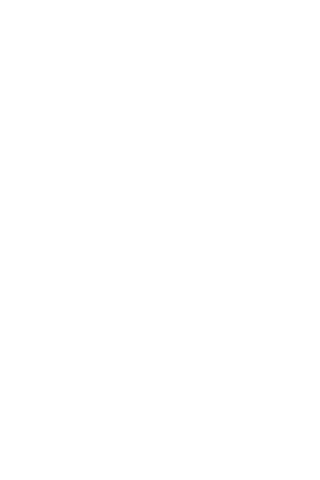

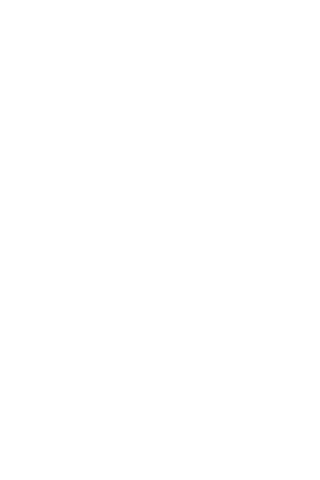

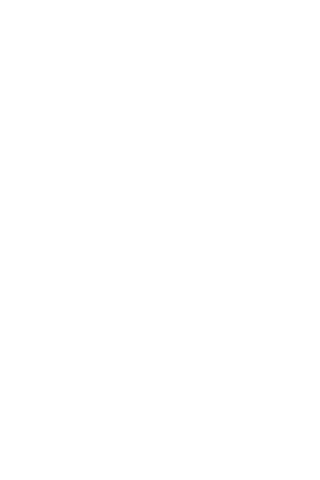

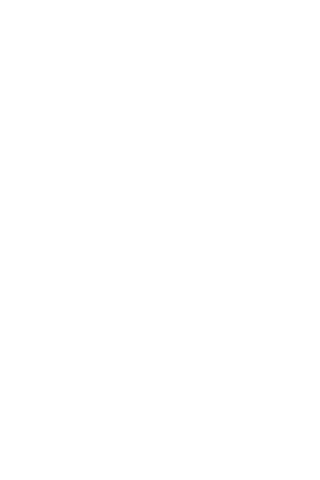

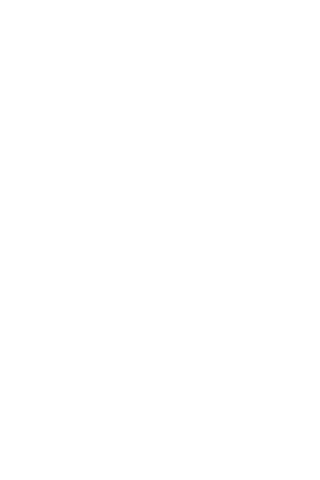

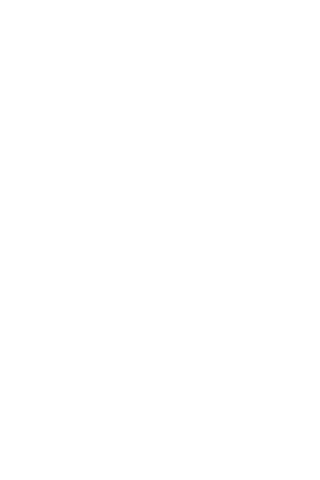

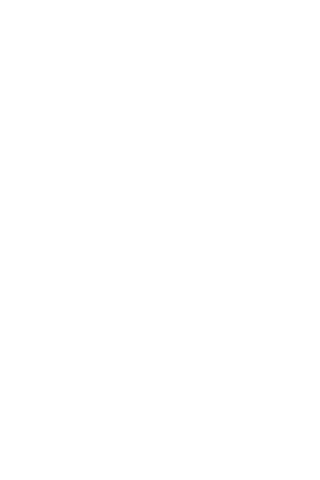

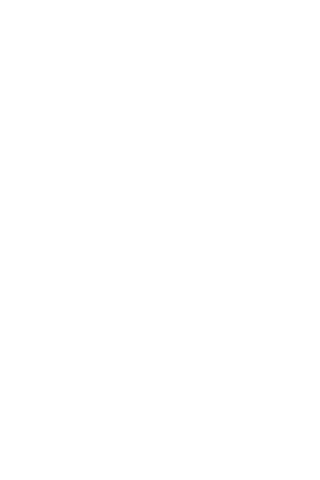

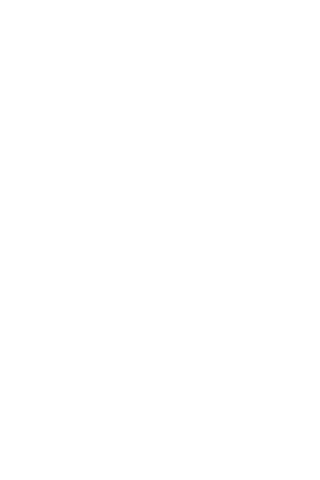

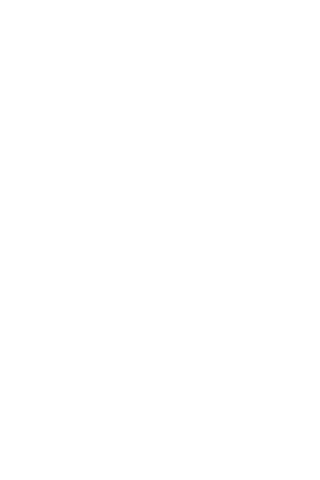

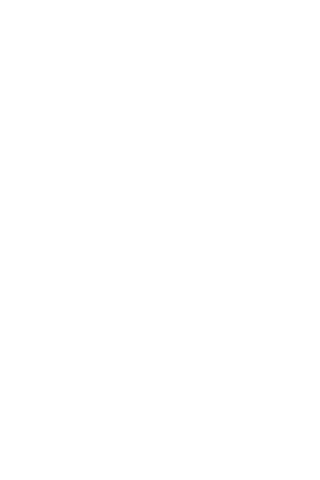

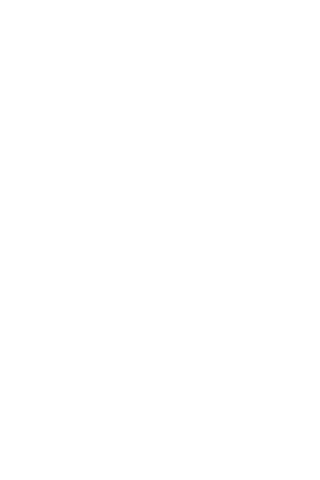

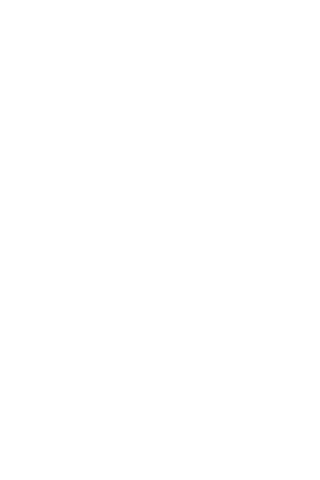

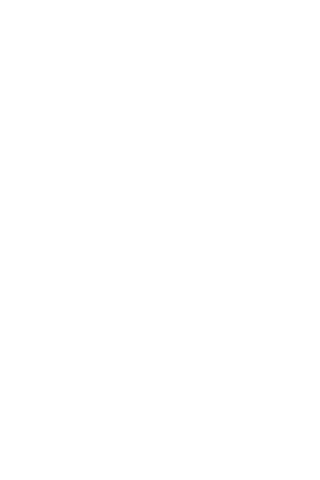

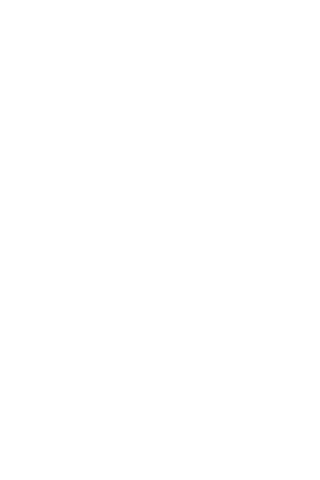

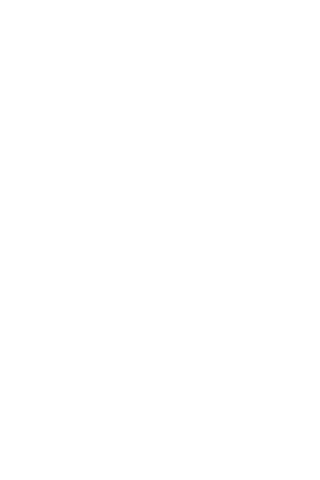

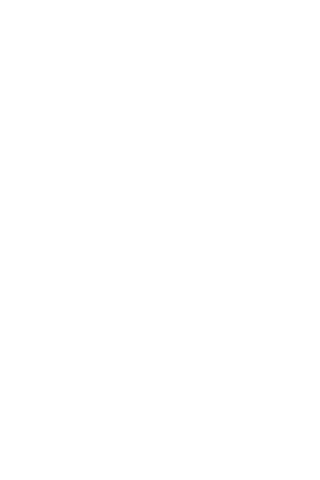

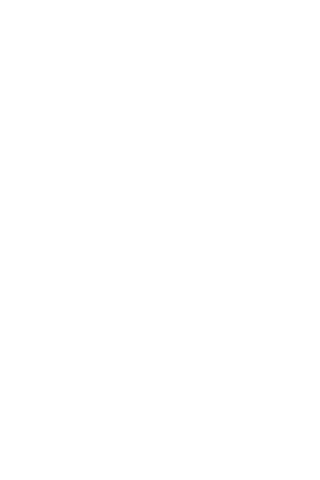

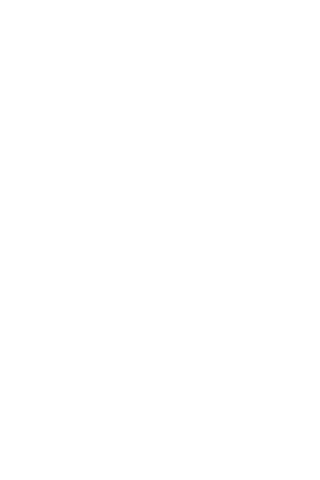

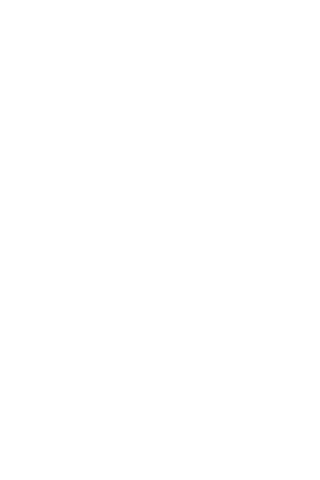

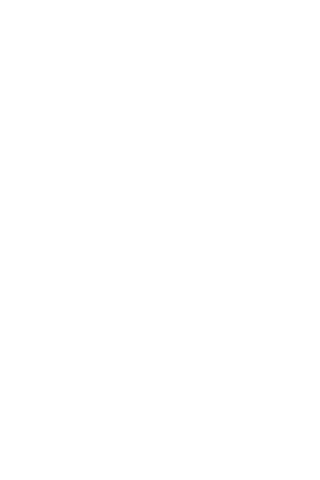

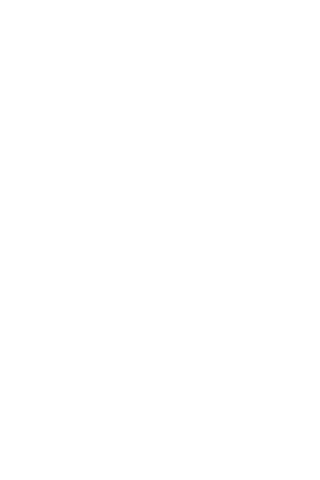

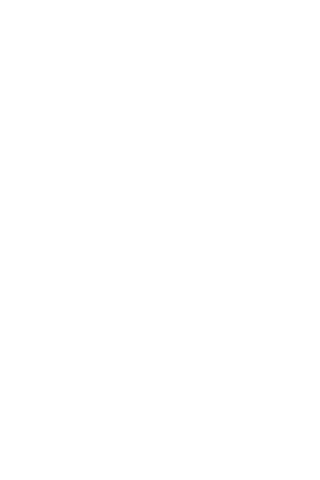

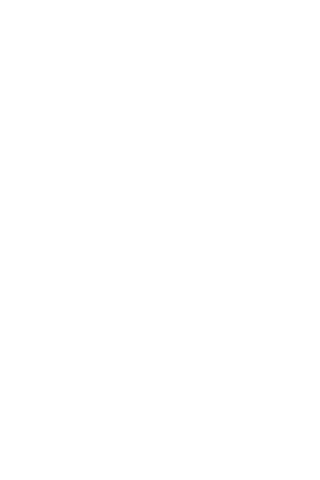

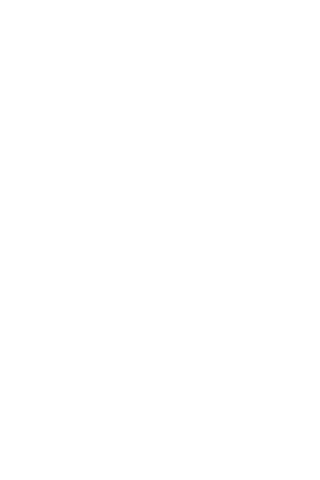

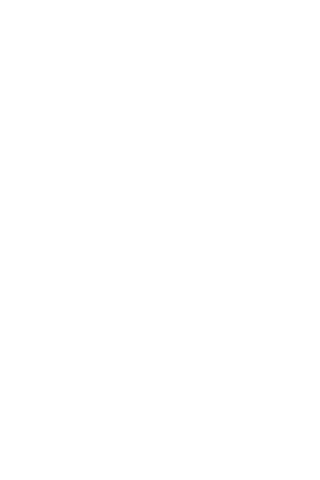

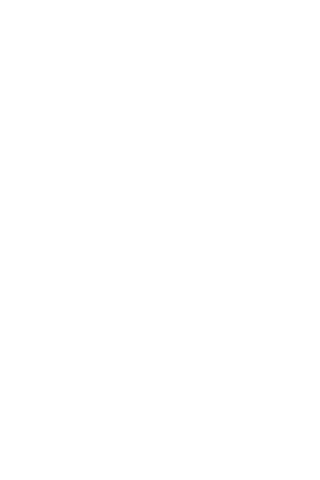

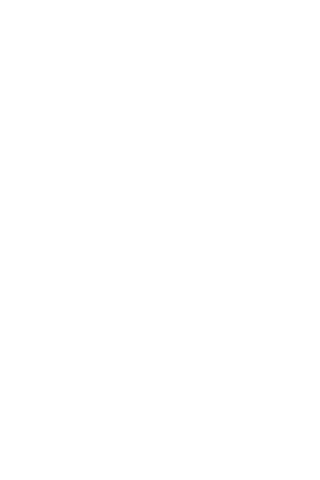

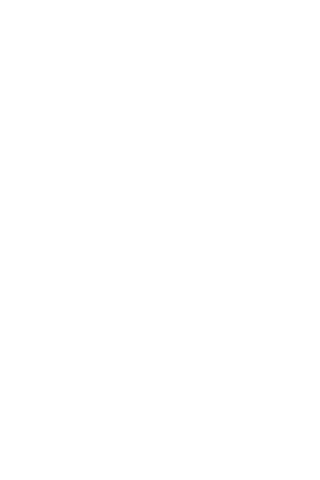

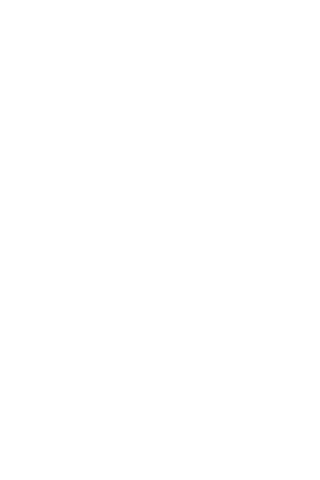

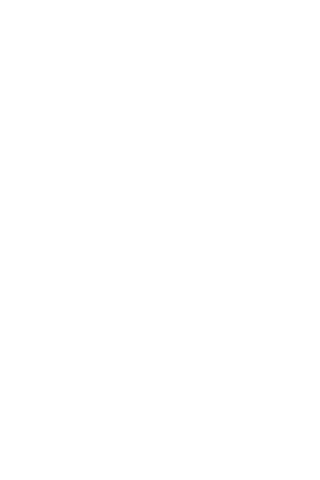

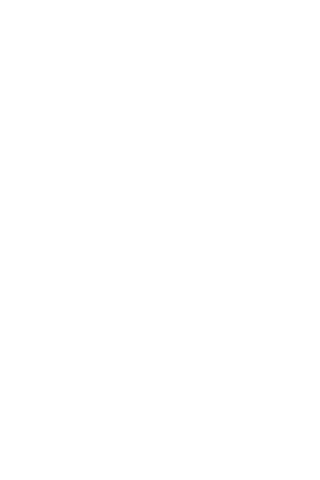

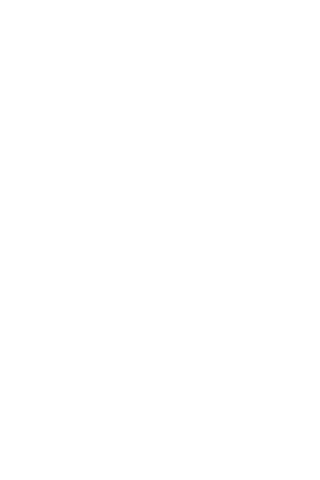

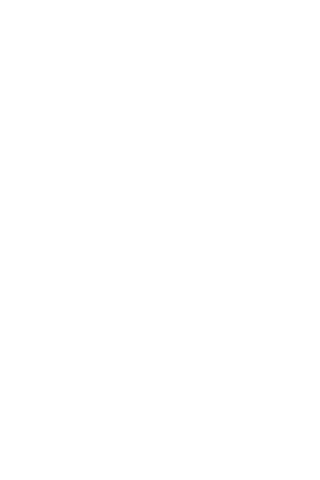

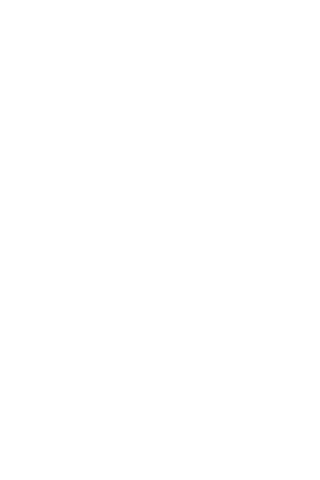

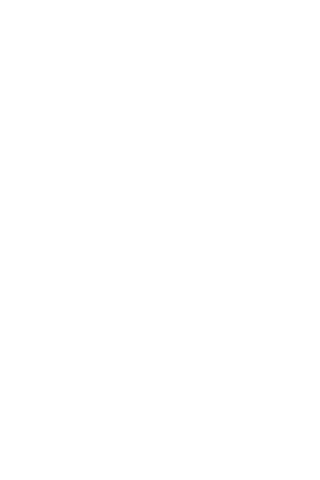

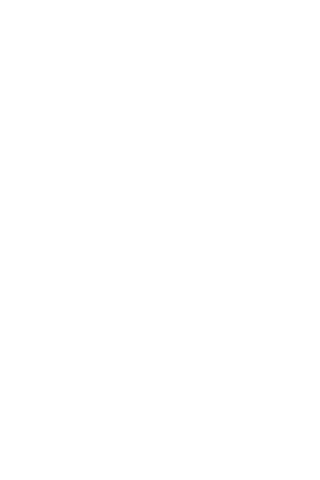

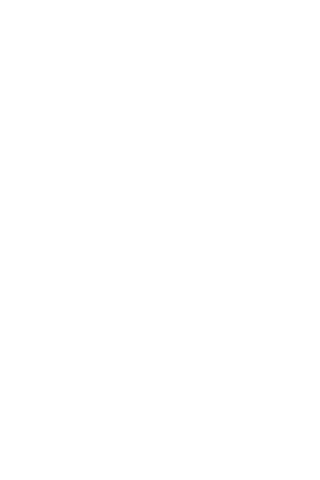

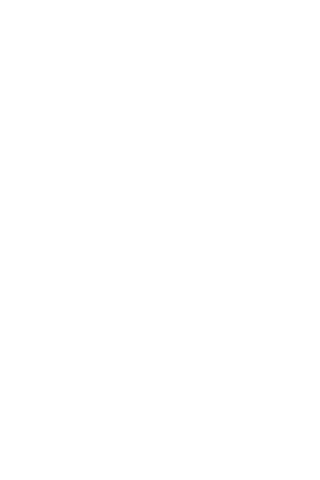

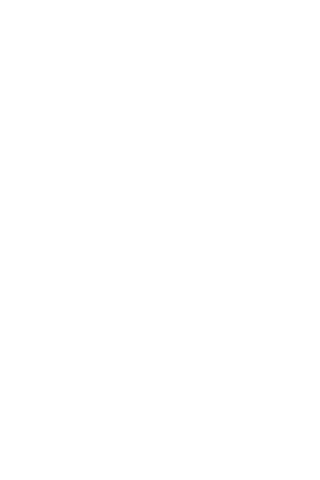

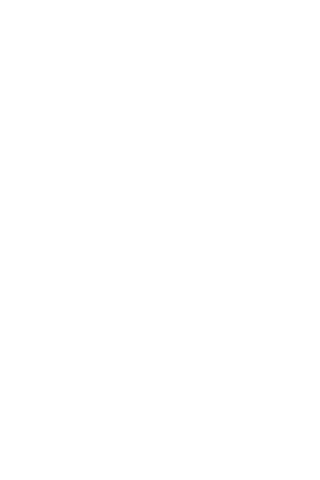

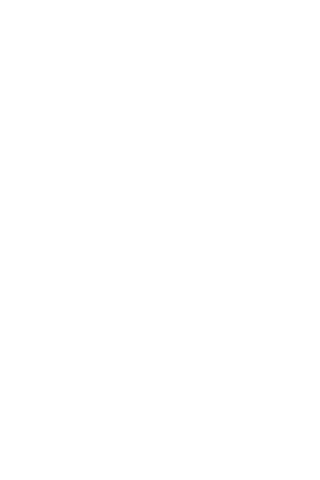

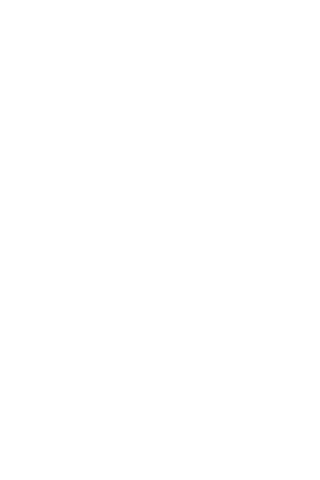

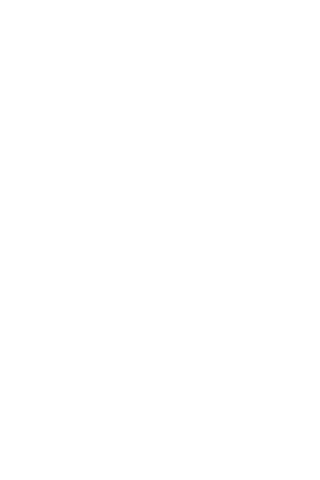

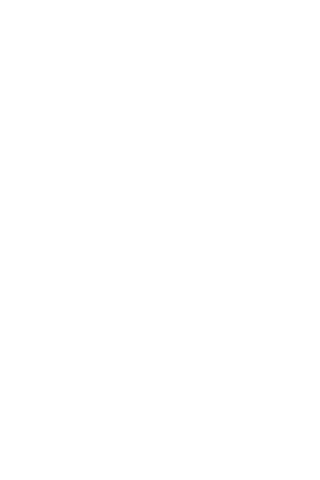

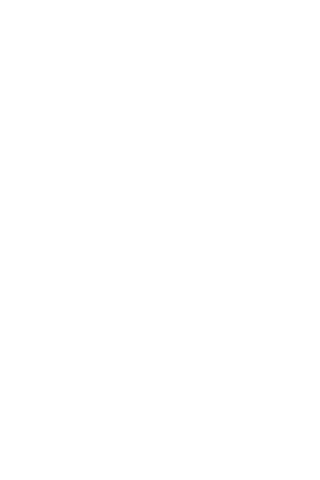

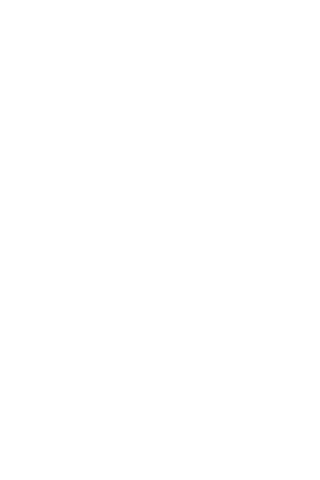

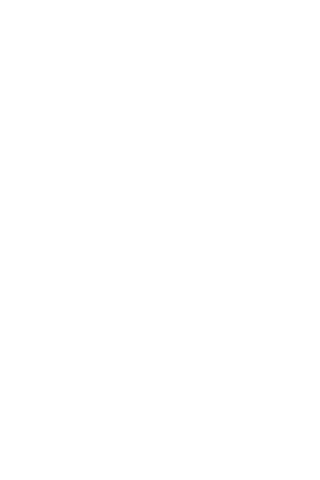

In [212]:
%matplotlib widget
width = []
save_width_path = os.path.join(storage_path,'video',"1045_20220504","width_image/")
for i in range(len(intersection[:80])):
    try:
        width.append(width_dict[intersection[i][:-4]])
        plt.figure(figsize=(4, 6), dpi=80)
        plt.plot(width,"-o")
        # # plt.xticks(np.arange(0,len(hr_list),1),labels=hr_list,rotation = 90)
        plt.rcParams.update({'font.size': 8})
        plt.ylim(5,15)
        plt.xlim(-2,85)
        plt.axis('off')
        plt.tight_layout()
        plt.savefig(fname= save_width_path+intersection[i][:-4]+"_width.png")
        plt.clf()
    except:
        print(f'cannot find {intersection[i][:-4]}')

116

### feature

In [ ]:
node_dict,slice_dict,width_dict,median_index_dict,median_slice_dict={},{},{},{},{}
collect=[]
node = 51

for i in range(-3,-len(file_names),-1):
    print(i)
    try:
        exp = Experiment(directory)
        select = folder_df[(folder_df["folder"] == file_names[i])]
        exp.load(select)
        exp.load_tile_information(0)
        p = Thread(target=get_median_slice_width, args=(exp,i,node,model,node_dict,slice_dict,width_dict,median_index_dict,median_slice_dict,120))
        p.start()
        collect.append(p)
    except:
        print(file_names[i]+"get error")   
        
for process in collect:
    process.join()

-3
2022-05-23 15:27:00
20220523_1527_Plate02get error
-4
2022-05-23 13:27:00
20220523_1327_Plate02get error
-5
2022-05-23 11:27:00
20220523_1127_Plate02get error
-6
2022-05-21 10:51:00
20220521_1051_Plate02get error
-7
2022-05-21 08:51:00
20220521_0851_Plate02get error
-8
2022-05-21 06:51:00
20220521_0651_Plate02get error
-9
2022-05-21 04:51:00
20220521_0451_Plate02get error
-10
2022-05-21 02:51:00
20220521_0251_Plate02get error
-11
2022-05-21 00:51:00
20220521_0051_Plate02get error
-12
2022-05-20 22:51:00
20220520_2251_Plate02get error
-13
2022-05-20 20:51:00
20220520_2051_Plate02get error
-14
2022-05-20 18:51:00
20220520_1851_Plate02get error
-15
2022-05-20 16:51:00
20220520_1651_Plate02get error
-16
2022-05-20 14:51:00
20220520_1451_Plate02get error
-17
2022-05-20 12:51:00
20220520_1251_Plate02get error
-18
2022-05-20 10:35:00
20220520_1035_Plate02get error
-19
2022-05-20 09:26:00
20220520_0926_Plate02get error
-20
2022-05-20 07:26:00
20220520_0726_Plate02get error
-21
2022-05-20 05

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

20220517_0211_Plate02get error
-48
2022-05-17 00:11:00
20220517_0011_Plate02get error
-49
2022-05-16 22:11:00
20220516_2211_Plate02get error
-50
2022-05-16 20:11:00
20220516_2011_Plate02get error
-51
2022-05-16 18:11:00
20220516_1811_Plate02get error
-52
2022-05-16 16:11:00
20220516_1611_Plate02get error
-53
2022-05-16 14:11:00
20220516_1411_Plate02get error
-54
2022-05-16 11:52:00
20220516_1152_Plate02get error
-55
2022-05-16 09:52:00
20220516_0952_Plate02get error
-56
2022-05-16 07:52:00
20220516_0752_Plate02get error
-57
2022-05-16 05:50:00
20220516_0550_Plate02get error
-58
2022-05-16 03:50:00
20220516_0350_Plate02get error
-59
2022-05-16 01:50:00
20220516_0150_Plate02get error
-60
2022-05-15 23:50:00
20220515_2350_Plate02get error
-61
2022-05-15 21:50:00
20220515_2150_Plate02get error
-62
2022-05-15 17:49:00
20220515_1749_Plate02get error
-63
2022-05-15 15:49:00
20220515_1549_Plate02get error
-64
2022-05-15 11:49:00
20220515_1149_Plate02get error
-65
2022-05-15 09:49:00
20220515_0

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

20220512_2146_Plate02get error
-94
2022-05-12 19:46:00
20220512_1946_Plate02get error
-95
2022-05-12 17:43:00
20220512_1743_Plate02get error
-96
2022-05-12 15:04:00
20220512_1504_Plate02get error
-97
2022-05-12 13:04:00
20220512_1304_Plate02get error
-98
2022-05-12 11:04:00
20220512_1104_Plate02get error
-99
2022-05-12 09:04:00
20220512_0904_Plate02get error
-100
2022-05-12 07:04:00
20220512_0704_Plate02get error
-101
2022-05-12 05:04:00
20220512_0504_Plate02get error
-102
2022-05-12 03:04:00
20220512_0304_Plate02get error
-103
2022-05-12 01:04:00
20220512_0104_Plate02get error
-104
2022-05-11 21:04:00
20220511_2104_Plate02get error
-105
2022-05-11 19:04:00
20220511_1904_Plate02get error
-106
2022-05-11 17:04:00
20220511_1704_Plate02get error
-107
2022-05-11 15:04:00
20220511_1504_Plate02get error
-108
2022-05-11 12:43:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

-109
2022-05-11 10:18:00
-110
2022-05-11 08:07:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


-111
2022-05-11 06:07:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


-112
2022-05-11 04:07:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


-113
2022-05-11 02:07:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


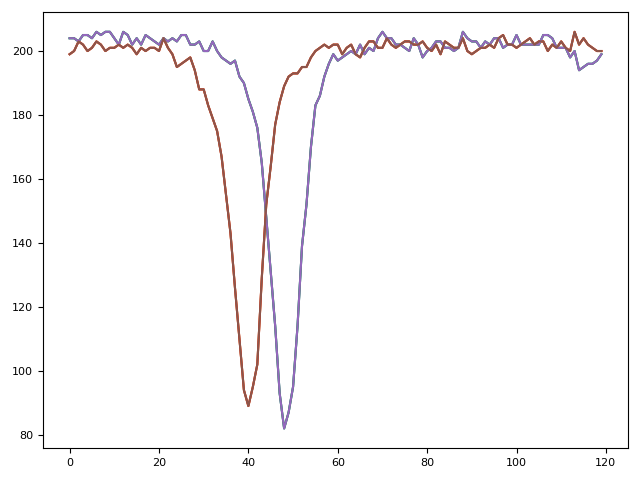

In [ ]:
save_feature_path = os.path.join(storage_path,'video',"1045_20220504","feature_image/")
for i in range(60,67):
    try:
        plt.plot(median_slice_dict[i])
        # plt.figure(figsize=(4, 6), dpi=80)
        plt.rcParams.update({'font.size': 8})
        plt.tight_layout()
        plt.savefig(fname= save_feature_path+file_names[i]+"_feature.png")
        plt.clf()
    except:
        pass

In [ ]:
len(os.listdir(save_feature_path)),len(os.listdir(save_video_path))

### test

In [ ]:
from video import *
node_dict,slice_dict,width_dict,median_index_dict,median_slice_dict={},{},{},{},{}
node = 51
exp = Experiment(directory)
collect = []
for index in range(-1,-200,-1):
    print(index)
    try:
        exp = Experiment(directory)
        select = folder_df[(folder_df["folder"] == file_names[index])]
        exp.load(select)
        exp.load_tile_information(0)
        _=get_edge_from_node(index,node_dict,node,exp)
        _=get_slices_from_node(index,slice_dict,node_dict,exp,target_length=120)
        # _=get_width_from_slices(index,model,slice_dict,width_dict)
        collect.append(np.median(width_dict[index]))
        print(sys.getsizeof(node_dict)+sys.getsizeof(slice_dict)+sys.getsizeof(width_dict)+sys.getsizeof(median_index_dict)+sys.getsizeof(median_slice_dict))
    except:
        print(file_names[index]+"get error") 

-1
2022-05-23 19:34:00
20220523_1934_Plate02get error
-2
2022-05-23 17:27:00
20220523_1727_Plate02get error
-3
2022-05-23 15:27:00
20220523_1527_Plate02get error
-4
2022-05-23 13:27:00
20220523_1327_Plate02get error
-5
2022-05-23 11:27:00
20220523_1127_Plate02get error
-6
2022-05-21 10:51:00
20220521_1051_Plate02get error
-7
2022-05-21 08:51:00
20220521_0851_Plate02get error
-8
2022-05-21 06:51:00
20220521_0651_Plate02get error
-9
2022-05-21 04:51:00
20220521_0451_Plate02get error
-10
2022-05-21 02:51:00
20220521_0251_Plate02get error
-11
2022-05-21 00:51:00
20220521_0051_Plate02get error
-12
2022-05-20 22:51:00
20220520_2251_Plate02get error
-13
2022-05-20 20:51:00
20220520_2051_Plate02get error
-14
2022-05-20 18:51:00
20220520_1851_Plate02get error
-15
2022-05-20 16:51:00
20220520_1651_Plate02get error
-16
2022-05-20 14:51:00
20220520_1451_Plate02get error
-17
2022-05-20 12:51:00
20220520_1251_Plate02get error
-18
2022-05-20 10:35:00
20220520_1035_Plate02get error
-19
2022-05-20 09:2

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

2022-05-17 16:50:00
20220517_1650_Plate02get error
-41
2022-05-17 14:50:00
20220517_1450_Plate02get error
-42
2022-05-17 12:50:00
20220517_1250_Plate02get error
-43
2022-05-17 10:11:00
20220517_1011_Plate02get error
-44
2022-05-17 08:11:00
20220517_0811_Plate02get error
-45
2022-05-17 06:11:00
20220517_0611_Plate02get error
-46
2022-05-17 04:11:00
20220517_0411_Plate02get error
-47
2022-05-17 02:11:00
20220517_0211_Plate02get error
-48
2022-05-17 00:11:00
20220517_0011_Plate02get error
-49
2022-05-16 22:11:00
20220516_2211_Plate02get error
-50
2022-05-16 20:11:00
20220516_2011_Plate02get error
-51
2022-05-16 18:11:00
20220516_1811_Plate02get error
-52
2022-05-16 16:11:00
20220516_1611_Plate02get error
-53
2022-05-16 14:11:00
20220516_1411_Plate02get error
-54
2022-05-16 11:52:00
20220516_1152_Plate02get error
-55
2022-05-16 09:52:00
20220516_0952_Plate02get error
-56
2022-05-16 07:52:00
20220516_0752_Plate02get error
-57
2022-05-16 05:50:00
20220516_0550_Plate02get error
-58
2022-05-16

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

20220513_2149_Plate02get error
-83
2022-05-13 19:49:00
20220513_1949_Plate02get error
-84
2022-05-13 17:49:00
20220513_1749_Plate02get error
-85
2022-05-13 15:49:00
20220513_1549_Plate02get error
-86
2022-05-13 13:49:00
20220513_1349_Plate02get error
-87
2022-05-13 11:49:00
20220513_1149_Plate02get error
-88
2022-05-13 09:49:00
20220513_0949_Plate02get error
-89
2022-05-13 07:49:00
20220513_0749_Plate02get error
-90
2022-05-13 05:46:00
20220513_0546_Plate02get error
-91
2022-05-13 01:46:00
20220513_0146_Plate02get error
-92
2022-05-12 23:46:00
20220512_2346_Plate02get error
-93
2022-05-12 21:46:00
20220512_2146_Plate02get error
-94
2022-05-12 19:46:00
20220512_1946_Plate02get error
-95
2022-05-12 17:43:00
20220512_1743_Plate02get error
-96
2022-05-12 15:04:00
20220512_1504_Plate02get error
-97
2022-05-12 13:04:00
20220512_1304_Plate02get error
-98
2022-05-12 11:04:00
20220512_1104_Plate02get error
-99
2022-05-12 09:04:00
20220512_0904_Plate02get error
-100
2022-05-12 07:04:00
20220512_

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_su

20220511_1243_Plate02get error
-109
2022-05-11 10:18:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


20220511_1018_Plate02get error
-110
2022-05-11 08:07:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


20220511_0807_Plate02get error
-111
2022-05-11 06:07:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


### video

In [ ]:
save_video_path = os.path.join(storage_path,'video',"1045_20220504","video_image/")

In [ ]:
collect=[]
save_img_path = os.path.join(storage_path,'video',"1045_20220504","video_image/")
def image_for_video(file_name:str,select_df):
    region_size = [[20500, 23800], [20800,24300]]
    exp = Experiment(directory)
    exp.load(select_df)
    exp.load_tile_information(0)
    plot_full(exp,t=0,downsizing=1,region = region_size,save_path= os.path.join(save_img_path,file_name+".png"))
    del exp
    plt.clf()
    return print(f'the mission for {file_name} is completed')

for i in range(len(file_names)):
    p = Process(target=image_for_video, args=(file_names[i],folder_df[(folder_df["folder"] == file_names[i])]))
    p.start()
    collect.append(p)
for process in collect:
    process.join()

### Combine all image

In [221]:
save_video_path = os.path.join(storage_path,'video',"1045_20220504","video_image/")
save_feature_path = os.path.join(storage_path,'video',"1045_20220504","feature_image/")
save_width_path = os.path.join(storage_path,'video',"1045_20220504","width_image/")
save_video_files = os.listdir(save_video_path)
save_feature_files = os.listdir(save_feature_path)
save_width_files = os.listdir(save_width_path)
save_video_files.sort()
save_feature_files.sort()
save_width_files.sort()
width_dict,od

({'20220504_1900_Plate02': 5.2975097,
  '20220504_2100_Plate02': 5.108846,
  '20220504_2300_Plate02': 5.187714,
  '20220505_0100_Plate02': 5.216663,
  '20220505_0300_Plate02': 5.279394,
  '20220505_0500_Plate02': 5.5470743,
  '20220505_0700_Plate02': 5.295464,
  '20220505_0900_Plate02': 5.4618864,
  '20220505_1100_Plate02': 5.390477,
  '20220505_1300_Plate02': 5.822842,
  '20220505_1500_Plate02': 6.60816,
  '20220505_1700_Plate02': 7.219164,
  '20220505_1900_Plate02': 7.6318793,
  '20220505_2100_Plate02': 8.264828,
  '20220506_0100_Plate02': 8.830468,
  '20220506_0300_Plate02': 9.075826,
  '20220506_0500_Plate02': 9.165726,
  '20220506_0700_Plate02': 9.087539,
  '20220506_0900_Plate02': 9.349606,
  '20220506_1100_Plate02': 9.970518,
  '20220506_1300_Plate02': 11.577235,
  '20220506_1500_Plate02': 11.29362,
  '20220506_2100_Plate02': 11.404742,
  '20220506_2347_Plate02': 11.4776745,
  '20220507_0147_Plate02': 10.637857,
  '20220507_0347_Plate02': 12.430767,
  '20220507_0547_Plate02': 13

In [223]:
save_video_files = save_video_files[1:-2]
save_video_files

['20220504_1900_Plate02.png',
 '20220504_2100_Plate02.png',
 '20220504_2300_Plate02.png',
 '20220505_0100_Plate02.png',
 '20220505_0300_Plate02.png',
 '20220505_0500_Plate02.png',
 '20220505_0700_Plate02.png',
 '20220505_0900_Plate02.png',
 '20220505_1100_Plate02.png',
 '20220505_1300_Plate02.png',
 '20220505_1500_Plate02.png',
 '20220505_1700_Plate02.png',
 '20220505_1900_Plate02.png',
 '20220505_2100_Plate02.png',
 '20220506_0100_Plate02.png',
 '20220506_0300_Plate02.png',
 '20220506_0500_Plate02.png',
 '20220506_0700_Plate02.png',
 '20220506_0900_Plate02.png',
 '20220506_1100_Plate02.png',
 '20220506_1300_Plate02.png',
 '20220506_1500_Plate02.png',
 '20220506_1900_Plate02.png',
 '20220506_2100_Plate02.png',
 '20220506_2347_Plate02.png',
 '20220507_0147_Plate02.png',
 '20220507_0347_Plate02.png',
 '20220507_0547_Plate02.png',
 '20220507_0947_Plate02.png',
 '20220507_1147_Plate02.png',
 '20220507_1747_Plate02.png',
 '20220507_1947_Plate02.png',
 '20220507_2147_Plate02.png',
 '20220507

In [225]:
save_feature_files = save_feature_files[1:-2]
save_feature_files

['20220504_1900_Plate02_feature.png',
 '20220504_2100_Plate02_feature.png',
 '20220504_2300_Plate02_feature.png',
 '20220505_0100_Plate02_feature.png',
 '20220505_0300_Plate02_feature.png',
 '20220505_0500_Plate02_feature.png',
 '20220505_0700_Plate02_feature.png',
 '20220505_0900_Plate02_feature.png',
 '20220505_1100_Plate02_feature.png',
 '20220505_1300_Plate02_feature.png',
 '20220505_1500_Plate02_feature.png',
 '20220505_1700_Plate02_feature.png',
 '20220505_1900_Plate02_feature.png',
 '20220505_2100_Plate02_feature.png',
 '20220506_0100_Plate02_feature.png',
 '20220506_0300_Plate02_feature.png',
 '20220506_0500_Plate02_feature.png',
 '20220506_0700_Plate02_feature.png',
 '20220506_0900_Plate02_feature.png',
 '20220506_1100_Plate02_feature.png',
 '20220506_1300_Plate02_feature.png',
 '20220506_1500_Plate02_feature.png',
 '20220506_2100_Plate02_feature.png',
 '20220506_2347_Plate02_feature.png',
 '20220507_0147_Plate02_feature.png',
 '20220507_0347_Plate02_feature.png',
 '20220507_0

In [228]:
save_width_files = save_width_files[1:-1]
save_width_files

['20220504_1900_Plate02_width.png',
 '20220504_2100_Plate02_width.png',
 '20220504_2300_Plate02_width.png',
 '20220505_0100_Plate02_width.png',
 '20220505_0300_Plate02_width.png',
 '20220505_0500_Plate02_width.png',
 '20220505_0700_Plate02_width.png',
 '20220505_0900_Plate02_width.png',
 '20220505_1100_Plate02_width.png',
 '20220505_1300_Plate02_width.png',
 '20220505_1500_Plate02_width.png',
 '20220505_1700_Plate02_width.png',
 '20220505_1900_Plate02_width.png',
 '20220505_2100_Plate02_width.png',
 '20220506_0100_Plate02_width.png',
 '20220506_0300_Plate02_width.png',
 '20220506_0500_Plate02_width.png',
 '20220506_0700_Plate02_width.png',
 '20220506_0900_Plate02_width.png',
 '20220506_1100_Plate02_width.png',
 '20220506_1300_Plate02_width.png',
 '20220506_1500_Plate02_width.png',
 '20220506_2100_Plate02_width.png',
 '20220506_2347_Plate02_width.png',
 '20220507_0147_Plate02_width.png',
 '20220507_0347_Plate02_width.png',
 '20220507_0547_Plate02_width.png',
 '20220507_0947_Plate02_widt

In [229]:
# Need to make sure the time point is the same
len(save_feature_files),len(save_video_files),len(save_width_files)

(80, 132, 80)

In [230]:
intersection = []
for i in save_feature_files:
    ch =""
    ch += i[:-12]
    ch += i[-4:]
    if ch in save_video_files:
        intersection.append(ch)

In [231]:
count = 0
for i in intersection:
    if i in save_video_files:
        ch = i[:-4] + "_width.png"
        if ch in save_width_files:
            ch = i[:-4] + "_feature.png"
            if ch in save_feature_files:
                count+=1
count

80

In [232]:
def img_to_video(img_files:list, save_img_path:str,save_file_name:str,choose_type = "normal",
                 width_files=None,save_width_path=None,width_value_list=None,
                 feature_files=None,save_feature_path=None):
    """
    img_files: list from os.listdir only file name
    save_img_path: str the main path to the folder you want to create movie.
    save_file_name: the name of the video. mp4
    choose_type: to handle the combine or normal type of video
    
    width_files:list from os.listdir only file name
    save_width_path: str the main path to the folder you save width img
    width_value_list: list for the correct width value
    """
    img_path = [os.path.join(save_img_path,file) for file in img_files]
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in img_path]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list] 
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    imgs = [cv2.imread(path) for path in img_path]
    for index,img in enumerate(imgs):
        pos = img.shape[0]//10, img.shape[1]//10
        cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(0, 0, 0),thickness=3)
        if choose_type == "width":
            width_path = [os.path.join(save_width_path,file) for file in width_files]
            width = cv2.imread(width_path[index]) 
            img[img.shape[0]-width.shape[0]:img.shape[0], img.shape[1]-width.shape[1]:img.shape[1]] = width
            pos2 = img.shape[1]-width.shape[1],img.shape[0]-width.shape[0]
            cv2.putText(img=img, text=str(np.around(width_value_list[index],1))+'um', org= pos2, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(255, 0, 0),thickness=2)
        if choose_type == "all":
            width_path = [os.path.join(save_width_path,file) for file in width_files]
            width = cv2.imread(width_path[index]) 
            img[img.shape[0]-width.shape[0]:img.shape[0], img.shape[1]-width.shape[1]:img.shape[1]] = width
            pos2 = img.shape[1]-width.shape[1],img.shape[0]-width.shape[0]
            cv2.putText(img=img, text=str(np.around(width_value_list[index],1))+'um', org= pos2, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=2, color=(255, 0, 0),thickness=2)
            feature_path = [os.path.join(save_feature_path,file) for file in feature_files]
            feature = cv2.imread(feature_path[index])
            resized = cv2.resize(feature, (img.shape[1]//3, img.shape[0]//3), interpolation = cv2.INTER_AREA)
            img[img.shape[0]-resized.shape[0]:img.shape[0], :resized.shape[1]] = resized
    imageio.mimsave(os.path.join(save_img_path,save_file_name),imgs)
    return imgs

In [233]:
img_to_video(img_files=intersection, save_img_path=save_video_path, save_file_name="combine_feature.mp4",choose_type = "all",
             width_files=save_width_files,save_width_path=save_width_path,width_value_list=width,
             feature_files=save_feature_files,save_feature_path=save_feature_path)

[array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
  

In [234]:
len(intersection),len(save_width_files),len(save_feature_files)

(80, 80, 80)

In [ ]:
save_feature_path = os.path.join(storage_path,'video',"1045_20220504","feature_image/")
save_feature_files = os.listdir(save_feature_path)
save_feature_files.sort()

## Useful code

In [ ]:
def get_edge_from_node(index,select,node_dict,node,exp):
    exp.load(select)
    exp.load_tile_information(0)
    t = 0
    G, pos = exp.nx_graph[t], exp.positions[t]
    node_dict[index] = list(G.edges(node))[0]
    return node_dict

def get_slices_from_node(index,select,slice_dict,node_dict,exp,target_length=120):
    exp.load(select)
    exp.load_tile_information(0)
    node1, node2 = node_dict[index]
    f_profiles = lambda edge: extract_section_profiles_for_edge(exp, 0, edge, resolution=5, offset=4, step=3,target_length=120)
    slices, coords1, coords2 = f_profiles(get_edge_from_node_labels(exp, 0, node1,node2))
    slice_dict[index] = slices
    return slice_dict

def get_width_from_slices(index,model,slice_dict,width_dict):
    predict_value = model.predict(slice_dict[index],verbose=0)
    width_dict[index] = predict_value
    return width_dict

def get_median_index_from_width(index,width_dict,median_index_dict):
    width = width_dict[index]
    median = np.median(width)
    if median > 1e5:
        median = np.median(np.delete(width, np.where(width == median)))
    median_index = np.where(width == median)[0]
    if len(median_index) == 0:
        median_index = (np.abs(width - median)).argmin()
    else:
        median_index = median_index[0]
    median_index_dict[index] = median_index
    width_dict[index] = median
    return width_dict, median_index_dict

def get_slice_from_median_index(index,median_index_dict,slice_dict,median_slice_dict):
    median_index = median_index_dict[index]
    slices = slice_dict[index]
    median_slice_dict[index] = slices[median_index]
    
def get_median_slice_width(exp,index,select,node,model,node_dict,slice_dict,width_dict,median_index_dict,median_slice_dict,target_length=120):
    get_edge_from_node(index,select,node_dict,node,exp)
    get_slices_from_node(index,select,slice_dict,node_dict,exp,target_length=120)
    get_width_from_slices(index,model,slice_dict,width_dict)
    get_median_index_from_width(index,width_dict,median_index_dict)
    get_slice_from_median_index(index,median_index_dict,slice_dict,median_slice_dict)
    return width_dict, median_slice_dict
def get_RH_BAS_edge(exp,select_node1,select_node2):
    """
    exp, Experiment class
    select_node1, int
    select_node2, int
    This function will get the edge by the shortest path.
    Make sure to remove the edge that do not make sense. For example, it is RH but grouped in BAS.
    """
    t = 0
    G, pos = exp.nx_graph[t], exp.positions[t]
    nodes = []
    node_label=[]
    all_edge = []
    for path in sorted(nx.shortest_path(G, select_node1, select_node2)):
        node_label.append(path)
        nodes.append(Node(path,exp))
        for i in list(G.neighbors(path)):
            nodes.append(Node(i,exp))
            edge = get_edge_from_node_labels(exp, 0, path, i)
            all_edge.append(edge)
    RH_edge = []
    for index in range(len(node_label[:-1])):
        node1, node2 = node_label[index], node_label[index+1]
        edge = get_edge_from_node_labels(exp, 0, node1, node2)
        RH_edge.append(edge)
    BAS_edge = list(set(all_edge).difference(RH_edge))
    return nodes, RH_edge, BAS_edge

def remove_BAS_edge(exp,RH_edge,BAS_edge,unwant_edge):
    """
    RH_edge, list
    BAS_edge, list
    unwant_edge, list in tuple form. Eg. remove edge(32,45),and edge(78,89). [(32,45),(78,89)]
    """
    remove_edge = [get_edge_from_node_labels(exp, 0, node1, node2) for node1, node2 in unwant_edge]
    for i in remove_edge:
        for j in range(len(BAS_edge)-1):
            if i == BAS_edge[j]:
                del BAS_edge[j]
        if i == BAS_edge[-1]:
            del BAS_edge[-1]
    return BAS_edge

def compute_edge_ratio(exp,model,RH_edge,BAS_edge):
    f_profiles = lambda edge: extract_section_profiles_for_edge(
        exp, 0, edge, resolution=5, offset=5, step=1,target_length=120)
    RH_value = []
    BAS_value = []
    for edge in RH_edge:
        slices, coords1, coords2 = f_profiles(edge)
        RH_value.append(np.median(model.predict(slices,verbose=0)))
    for edge in BAS_edge:
        slices, coords1, coords2 = f_profiles(edge)
        BAS_value.append(np.median(latest.predict(slices,verbose=0)))
    print(np.std(RH_value), np.mean(RH_value))
    print(np.std(BAS_value), np.mean(BAS_value))
    print(np.mean(BAS_value)/np.mean(RH_value))
    return RH_value,BAS_value

# Whole plate

In [2]:
%load_ext autoreload
%matplotlib widget
%autoreload 2
import os
import sys
sys.path.append("/home/ipausers/lin/Desktop/AMF/AMFtrack")
from amftrack.pipeline.launching.run_super import (
    run_launcher,
    directory_scratch,
    directory_project,
    directory_project,
    run_parallel_stitch,
    run_parallel_transfer,
)
import os
from amftrack.util.sys import (
    get_dates_datetime,
    get_dirname,
    temp_path,
    get_data_info,
    update_plate_info,
    update_analysis_info,
    get_analysis_info,
    get_current_folders,
    get_folders_by_plate_id,
    get_analysis_folders,
    get_time_edge_info_from_analysis
    
)
from time import time_ns
from amftrack.util.dbx import upload_folders, load_dbx, download, get_dropbox_folders
from datetime import datetime
from amftrack.pipeline.functions.image_processing.experiment_util import (
    plot_full_image_with_features,
)
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    load_graphs,
)
from amftrack.pipeline.functions.post_processing.extract_study_zone import (
    load_study_zone,
)
from amftrack.pipeline.functions.post_processing.util import (
    is_in_study_zone,
)
from amftrack.pipeline.functions.image_processing.experiment_util import (
    get_random_edge,
    distance_point_edge,
    plot_edge,
    plot_edge_cropped,
    find_nearest_edge,
    get_edge_from_node_labels,
    plot_full_image_with_features,
    get_all_edges,
    get_all_nodes,
    find_neighboring_edges,
    reconstruct_image,
    reconstruct_skeletton_from_edges,
    reconstruct_skeletton_unicolor,
    plot_edge_width,
    reconstruct_image_from_general,
    plot_full,
)
from amftrack.pipeline.functions.image_processing.extract_width_fun import (
    get_width_info,
    get_width_info_new,
)
import matplotlib.pyplot as plt
from amftrack.pipeline.functions.image_processing.experiment_class_surf import (
    Experiment,
    save_graphs,
)
sys.path.append("/home/ipausers/lin/Desktop/Kai/Graduation-Project")
from models.config import *
from models.video import *
from models.model import *
from models.exp_surf import *
from multiprocessing import Process,Manager
from threading import Thread

2023-02-24 13:31:55.114515: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-24 13:32:02.187760: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ipausers/lin/Desktop/Kai/Graduation-Project/graduation/lib/python3.8/site-packages/cv2/../../lib64:
2023-02-24 13:32:02.187779: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-02-24 13:32:17.063264: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load 

## Check along the hyphae

In [2]:
# dropbox = "/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai"
# directory = os.path.join(dropbox,"1045_20220504/")
directory = os.path.join(storage_path,"video","1045_20220504/")
update_plate_info(directory)
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()

analysed:   0%|          | 0/69 [00:00<?, ?it/s]

In [3]:
from models.model import load_model
latest = load_model(model_path,"BO_without_crop_best_model")
f = lambda n: generate_index_along_sequence(n, resolution=4, offset=5)
f_profiles = lambda edge: extract_section_profiles_for_edge(
    exp, 0, edge, resolution=5, offset=4, step=3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [4]:
i=42
select = folder_df[(folder_df["folder"] ==file_names[i])]

In [5]:
exp = Experiment(directory)
exp.load(select)
exp.load_tile_information(0)

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-15 03:49:00


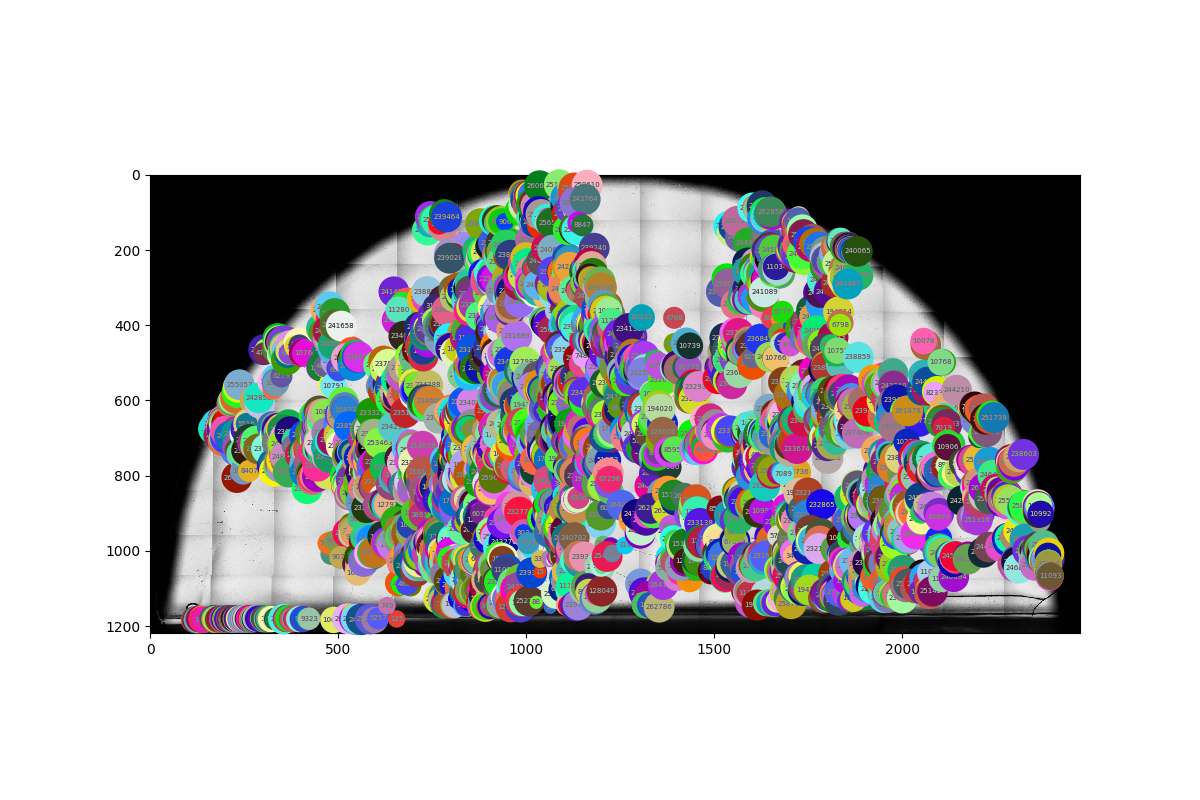

In [6]:
%matplotlib widget
plot_full(exp,t=0,downsizing=20,edges=get_all_edges(exp, 0),
                                nodes=get_all_nodes(exp, 0))

In [8]:
import networkx as nx
from exp_surf import *
nodes, RH_edge,BAS_edge = get_RH_BAS_edge(exp,237018,128005)
%matplotlib widget
# plot_full(
#     exp,
#     t=0,
#     downsizing=20,
#     nodes = nodes,
#     edges = BAS_edge
# )

In [9]:
BAS_edge

[Edge(234627,237052),
 Edge(258367,235444),
 Edge(236703,236704),
 Edge(237457,128005),
 Edge(238819,235958),
 Edge(235958,236700),
 Edge(238186,236695),
 Edge(237016,237018),
 Edge(236700,237023),
 Edge(236704,235958),
 Edge(235181,236712),
 Edge(233856,128005),
 Edge(237018,237828),
 Edge(236695,237018),
 Edge(235444,236704)]

In [10]:
RH_edge

[Edge(128005,234627),
 Edge(234627,235181),
 Edge(235181,235444),
 Edge(236695,236700)]

In [11]:
BAS_edge = remove_BAS_edge(exp,RH_edge,BAS_edge,[(233856,128005),(237018,237828)])
compute_edge_ratio(exp,latest,RH_edge,BAS_edge)

RH std:0.8206080794334412 mean:3.0088067054748535
BAS std:1.1574816703796387 mean:2.8339784145355225
BAS/RH : 0.9418944716453552


([2.1314545, 3.7545462, 3.8989472, 2.250278],
 [3.939012,
  4.5455217,
  1.8078085,
  2.188701,
  0.31001443,
  1.6933389,
  3.6597936,
  3.6371684,
  2.1576767,
  3.2647483,
  3.05578,
  2.3722568,
  4.209905])

In [12]:
BAS_edge

[Edge(234627,237052),
 Edge(258367,235444),
 Edge(236703,236704),
 Edge(237457,128005),
 Edge(238819,235958),
 Edge(235958,236700),
 Edge(238186,236695),
 Edge(237016,237018),
 Edge(236700,237023),
 Edge(236704,235958),
 Edge(235181,236712),
 Edge(236695,237018),
 Edge(235444,236704)]

## Edge distribution

In [3]:
directory = dropbox + "1045_20220504/"
update_analysis_info(directory)
analysis_info = get_analysis_info(directory)
update_plate_info(directory, local=True)
all_folders = get_current_folders(directory, local=True)
plates = ["1045_20220504"]
folders = all_folders.loc[all_folders["unique_id"].isin(plates)]
folders = folders.sort_values(by="datetime")
files = folders.folder.tolist()
save_width_path = os.path.join(storage_path,'video',"1045_20220504/","whole_plate_width_distribution/")

analysed:   0%|          | 0/4 [00:00<?, ?it/s]

KeyError: 'unique_id'

In [ ]:
from exp_surf import *
for i in range(len(files)):
    try:
        exp = Experiment(directory)
        exp.load(folders[i:i+1])
        get_width_hist_combine(exp,0,save_width_path,files[i])
        del exp
        print(f'Processing {i},  {file}')
    except:
        print(f"{i},  {files[i]} cannot find.")

In [ ]:
def get_edge_width_from_analysis(analysis_path):
    path_time_edge = os.path.join(analysis_path, "time_edge_info")
    path_save = os.path.join(analysis_path, "folder_info.json")
    folders_plate = pd.read_json(path_save)
    folders_plate = folders_plate.reset_index()
    folders_plate = folders_plate.sort_values("datetime")
    json_paths = os.listdir(path_time_edge)
    tables = []
    for path in json_paths:
        try:
            index = int(path.split("_")[-1].split(".")[0])
            line = folders_plate.iloc[index]
            table = pd.read_json(os.path.join(path_time_edge, path))
        except:
            print(os.path.join(path_time_edge, path))
            continue
        table = table.transpose()
        table = table.fillna(-1)
        table["time_since_begin_h"] = (line["datetime"] - folders_plate["datetime"].iloc[0])
        table["folder"] = line["folder"]
        table["datetime"] = line["datetime"]
        tables.append(table)
    time_edge_info_plate = pd.concat(tables, axis=0, ignore_index=True)
    time_edge_info_plate.reset_index(inplace=True, drop=True)
    return time_edge_info_plate
analysis_path = os.path.join(dropbox,"1045_20220504","Analysis_1045_20220504_189_Version1")
edge_table = get_edge_width_from_analysis(analysis_path)

/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai/1045_20220504/Analysis_1045_20220504_189_Version1/time_edge_info/edge_info_144.json


In [227]:
edge = edge_table.sort_values("datetime")

In [253]:
def remove_zero_from_edge_width_table(edge_table):
    edge_dict = {}
    edge = edge_table.sort_values("datetime")
    for i in edge.folder.unique():
        edge_dict[i] = edge[edge["folder"] == i ].width_edge
    for key,v
    alue in edge_dict.items():
        value = value.to_numpy()
        value = value[value != 0]
        edge_dict[key] = value
    return edge_dict

In [276]:
## by original width
from exp_surf import get_width_hist
count=0
for key, value in edge_dict.items():
    count+=1
    ymax = 1000
    if count >=41:
        ymax = 4000
    get_width_hist(value,save_width_path,key,xmax=18,ymax=ymax,save=True)

In [275]:
count = 0
for i in files:
    count+=1
    if i == "20220508_0347_Plate02.png":
        break
count

41

In [277]:
files = os.listdir(save_width_path)
files.sort()
files = files[1:]
len(files)

200

In [278]:
files

['20220504_1900_Plate02.png',
 '20220504_2100_Plate02.png',
 '20220504_2300_Plate02.png',
 '20220505_0100_Plate02.png',
 '20220505_0300_Plate02.png',
 '20220505_0500_Plate02.png',
 '20220505_0700_Plate02.png',
 '20220505_0900_Plate02.png',
 '20220505_1100_Plate02.png',
 '20220505_1300_Plate02.png',
 '20220505_1500_Plate02.png',
 '20220505_1700_Plate02.png',
 '20220505_1900_Plate02.png',
 '20220505_2100_Plate02.png',
 '20220505_2300_Plate02.png',
 '20220506_0100_Plate02.png',
 '20220506_0300_Plate02.png',
 '20220506_0500_Plate02.png',
 '20220506_0700_Plate02.png',
 '20220506_0900_Plate02.png',
 '20220506_1100_Plate02.png',
 '20220506_1300_Plate02.png',
 '20220506_1500_Plate02.png',
 '20220506_1700_Plate02.png',
 '20220506_1900_Plate02.png',
 '20220506_2100_Plate02.png',
 '20220506_2347_Plate02.png',
 '20220507_0147_Plate02.png',
 '20220507_0347_Plate02.png',
 '20220507_0547_Plate02.png',
 '20220507_0747_Plate02.png',
 '20220507_0947_Plate02.png',
 '20220507_1147_Plate02.png',
 '20220507

In [279]:
storage_path

'/home/ipausers/lin/Desktop/data/'

In [7]:
## by log scale and width / total length
analysis_path = os.path.join(dropbox,"0217extract","1045_20220504","Analysis_1045_20220504_200_Version1")
edge_table = get_edge_width_from_analysis(analysis_path)
edge = edge_table.sort_values("datetime")

In [ ]:
for i in edge.folder.unique():
    table = edge[edge.folder == i]
    plt.hist(table['width_edge'],20,weights=table['tot_length_C'],density=True,log=True)
    plt.xlabel('Width ($\mathit{\mu m}$)')
    plt.ylabel("Frequency Log scale")
    plt.xlim(0,15)
    plt.tight_layout()
    plt.savefig(fname= save_width_path+i+".png")
    plt.clf()

In [2]:
save_video_path = os.path.join(storage_path,'video',"1045_20220504","whole_plate_width/")
save_width_path = os.path.join(storage_path,'video',"1045_20220504","whole_plate_width_distribution/")
save_video_files = os.listdir(save_video_path)
save_width_files = os.listdir(save_width_path)
save_video_files.sort()
save_width_files.sort()
save_width_files = save_width_files[1:]

In [3]:
mimic_video_files=[]
for i in range(189):
    mimic_video_files.append("frame_"+str(i)+".png")

In [4]:
video_path = [os.path.join(save_video_path,file) for file in mimic_video_files]
width_path = [os.path.join(save_width_path,file) for file in save_width_files]
date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in width_path]
datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
diff_list = [(date - datetime_list[0]) for date in datetime_list]
hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 

In [5]:
save_frame_path = os.path.join(storage_path,'video',"1045_20220504","frame_for_whole_plate/")

In [ ]:
index= 0
img = cv2.imread(video_path[index])

In [ ]:
for index in range(189):
    img = cv2.imread(video_path[index])
    img = cv2.resize(img, (img.shape[1]//10, img.shape[0]//10), interpolation = cv2.INTER_AREA)
    width = cv2.imread(width_path[index])
    pos = img.shape[0]//2, img.shape[1]//10
    cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=3, color=(0, 0, 0),thickness=1)
    resized = cv2.resize(width, (img.shape[1]//4, img.shape[0]//4), interpolation = cv2.INTER_AREA)
    img[img.shape[0]-resized.shape[0]:img.shape[0], :resized.shape[1]] = resized
    cv2.imwrite(save_frame_path+mimic_video_files[index], img, [int(cv2.IMWRITE_PNG_COMPRESSION), 3])

In [11]:
frame_path = [os.path.join(save_frame_path ,file) for file in mimic_video_files]
frames = [cv2.imread(path) for path in frame_path]
imageio.mimsave(os.path.join(save_frame_path,"combine.mp4"),frames)

['/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_0.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_1.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_2.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_3.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_4.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_5.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_6.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_7.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_8.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_9.png',
 '/home/ipausers/lin/Desktop/data/video/1045_20220504/frame_for_whole_plate/frame_10.png',
 '/home/i

In [ ]:
imgs = [cv2.imread(path) for path in video_path]

In [ ]:
widths = [cv2.imread(path) for path in width_path]

In [ ]:
for index,img in enumerate(imgs):
    pos = img.shape[0]//9, img.shape[1]//9
    cv2.putText(img=img, text=hr_list[index], org=pos, fontFace=cv2.FONT_HERSHEY_TRIPLEX, fontScale=10, color=(0, 0, 0),thickness=5)
    width = widths[index]
    resized = cv2.resize(width, (img.shape[1]//4, img.shape[0]//4), interpolation = cv2.INTER_AREA)
    img[img.shape[0]-resized.shape[0]:img.shape[0], :resized.shape[1]] = resized
imageio.mimsave(os.path.join(save_video_path,"combine.mp4"),imgs)

## create stacked bar plot to visualize the width distribution

In [ ]:
## by log scale and width / total length
analysis_path = os.path.join(dropbox,"0217extract","1045_20220504","Analysis_1045_20220504_200_Version1")
edge_table = get_edge_width_from_analysis(analysis_path)
edge = edge_table.sort_values("datetime")

0.28571428571428575


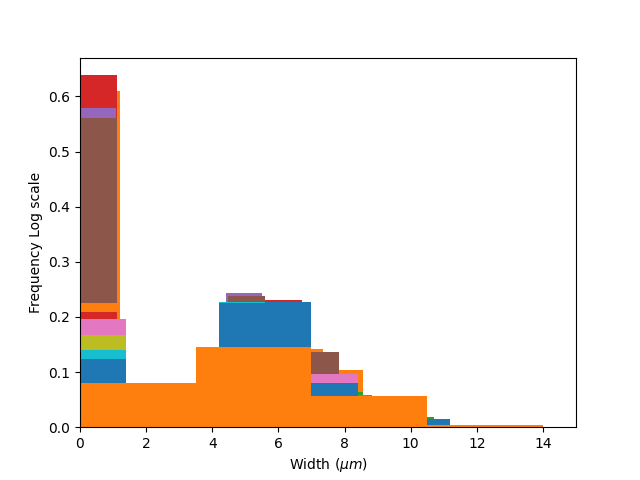

0.2857142857142857


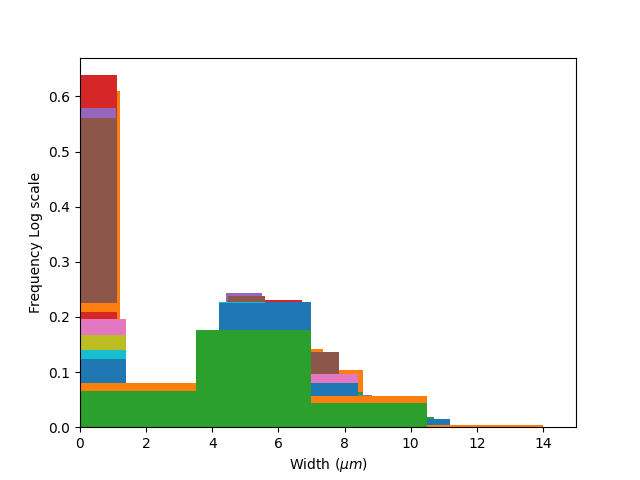

0.28571428571428575


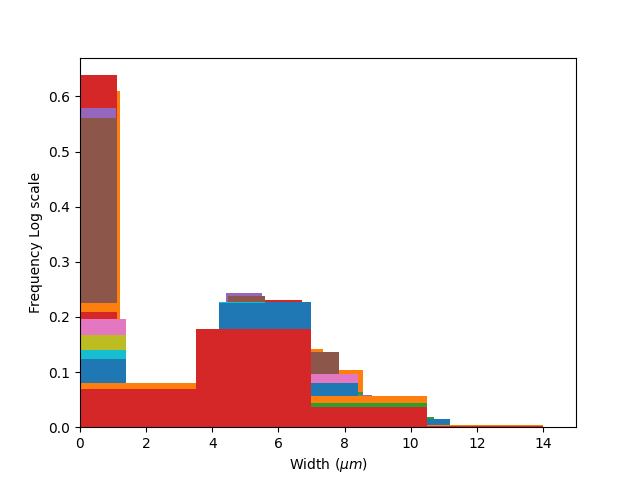

0.2857142857142857


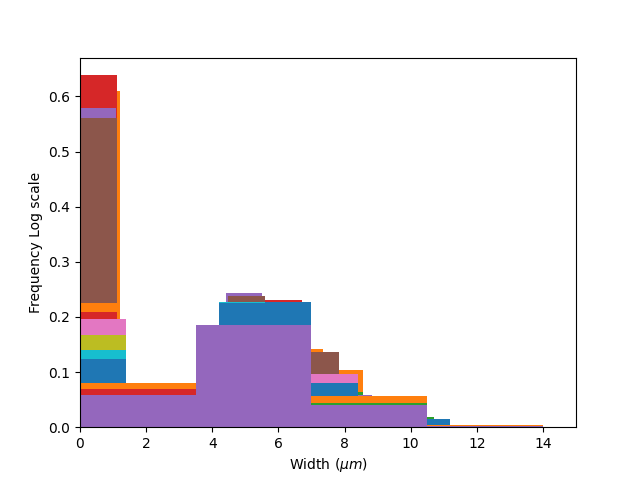

0.2857142857142857


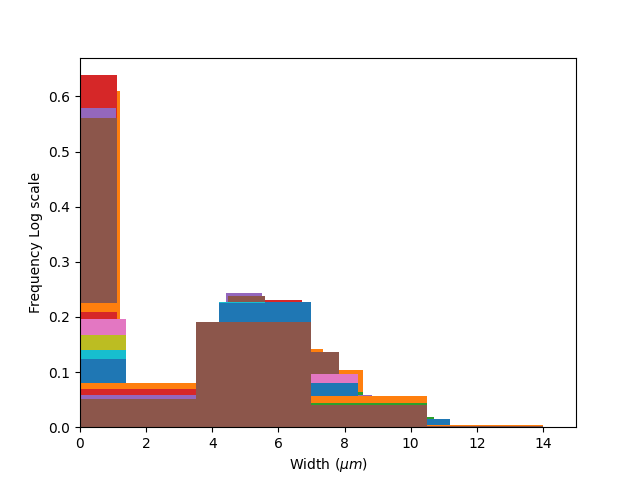

In [82]:
count = 0
for i in edge.folder.unique():
    count+=1
    if count ==6:
        break
    table = edge[edge.folder == i]
    plt.xlabel('Width ($\mathit{\mu m}$)')
    plt.ylabel("Frequency Log scale")
    get = plt.hist(table['width_edge'],bins=4,weights=table['tot_length_C'],density=True)
    print(sum(get[0]))
    plt.show()

In [538]:
edge.folder.unique()[:72:12]

array(['20220504_1900_Plate02', '20220505_1900_Plate02',
       '20220506_1900_Plate02', '20220507_1947_Plate02',
       '20220508_1959_Plate02', '20220509_2336_Plate02'], dtype=object)

In [ ]:
def get_hr_list_from_folder(folder_list):
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in folder_list]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list]
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    return hr_list

In [572]:
plt.clf()

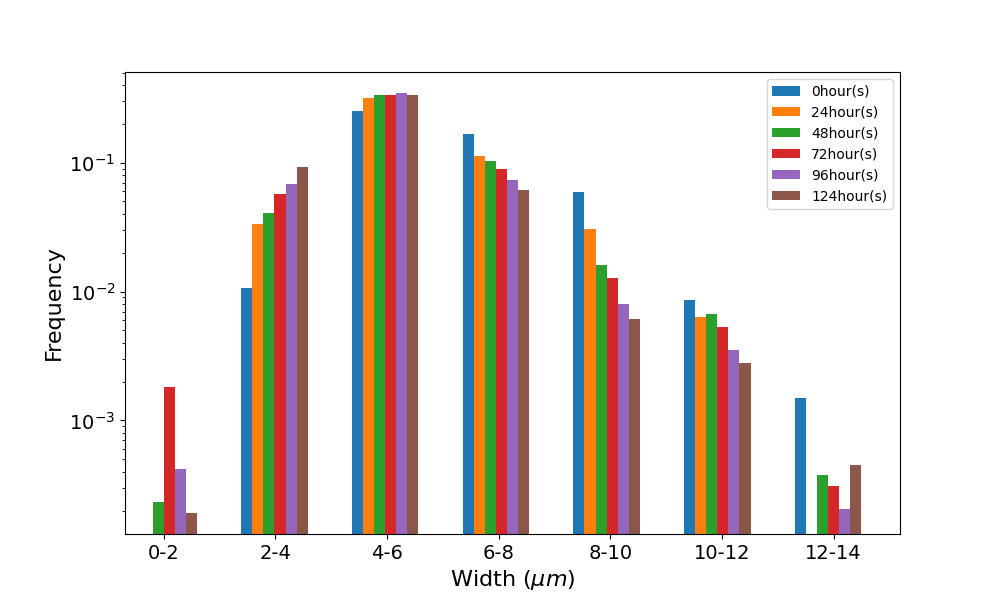

In [587]:
%matplotlib widget
plt.figure(figsize=(10,6))
count = 0
file = edge.folder.unique()[:72:12]
width = 0.2
bins = 7
boundry = 14
ticks = width*len(file)/2 
for i in file:
    count+=1
    table = edge[edge.folder == i]
    table = table[table["width_edge"] !=0]
    hist,bin_=np.histogram(table['width_edge'], bins=bins, range=[0,boundry], density=True,weights=table['tot_length_C'])
    plt.bar(bin_[:-1]+count*width,hist,width=width)
plt.xticks(np.linspace(ticks+ width/2,boundry-ticks*2,bins), ['0-2', '2-4', '4-6', '6-8', '8-10',"10-12","12-14"],fontsize=14)
plt.xlabel("Width ($\mathit{\mu m}$)",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.yscale("log")
plt.xlim(0,14)
plt.rc('ytick', labelsize=14)
plt.legend(get_hr_list_from_folder(file))
plt.show()

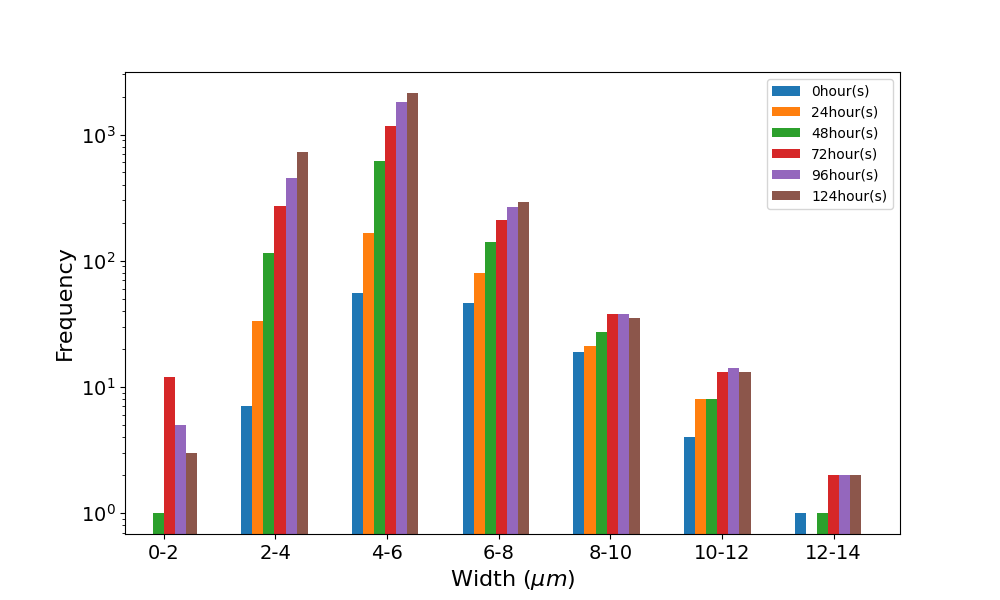

In [583]:
%matplotlib widget
plt.figure(figsize=(10,6))
count = 0
file = edge.folder.unique()[:72:12]
width = 0.2
bins = 7
boundry = 14
ticks = width*len(file)/2 
for i in file:
    count+=1
    table = edge[edge.folder == i]
    table = table[table["width_edge"] !=0]
    hist,bin_=np.histogram(table['width_edge'], bins=bins, range=[0,boundry])
    plt.bar(bin_[:-1]+count*width,hist,width=width)
plt.xticks(np.linspace(ticks+ width/2,boundry-ticks*2,bins), ['0-2', '2-4', '4-6', '6-8', '8-10',"10-12","12-14"],fontsize=14)
plt.xlabel("Width ($\mathit{\mu m}$)",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.yscale("log")
plt.xlim(0,14)
plt.rc('ytick', labelsize=14)
plt.legend(get_hr_list_from_folder(file))
plt.show()

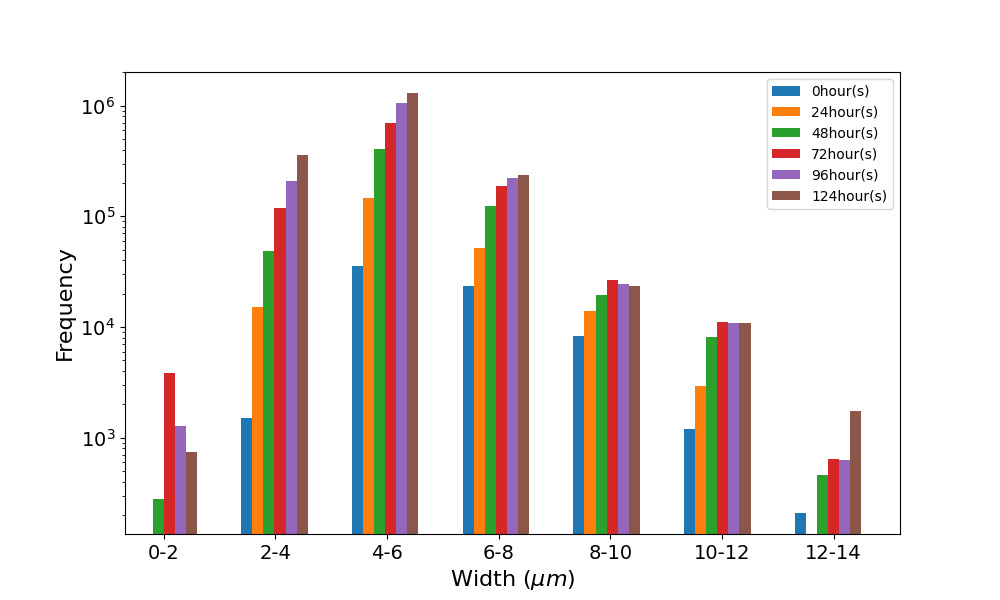

In [588]:
%matplotlib widget
plt.figure(figsize=(10,6))
count = 0
file = edge.folder.unique()[:72:12]
width = 0.2
bins = 7
boundry = 14
ticks = width*len(file)/2 
for i in file:
    count+=1
    table = edge[edge.folder == i]
    table = table[table["width_edge"] !=0]
    hist,bin_=np.histogram(table['width_edge'], bins=bins, range=[0,boundry], weights=table['tot_length_C'])
    plt.bar(bin_[:-1]+count*width,hist,width=width)
plt.xticks(np.linspace(ticks+ width/2,boundry-ticks*2,bins), ['0-2', '2-4', '4-6', '6-8', '8-10',"10-12","12-14"],fontsize=14)
plt.xlabel("Width ($\mathit{\mu m}$)",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.yscale("log")
plt.xlim(0,14)
plt.rc('ytick', labelsize=14)
plt.legend(get_hr_list_from_folder(file))
plt.show()

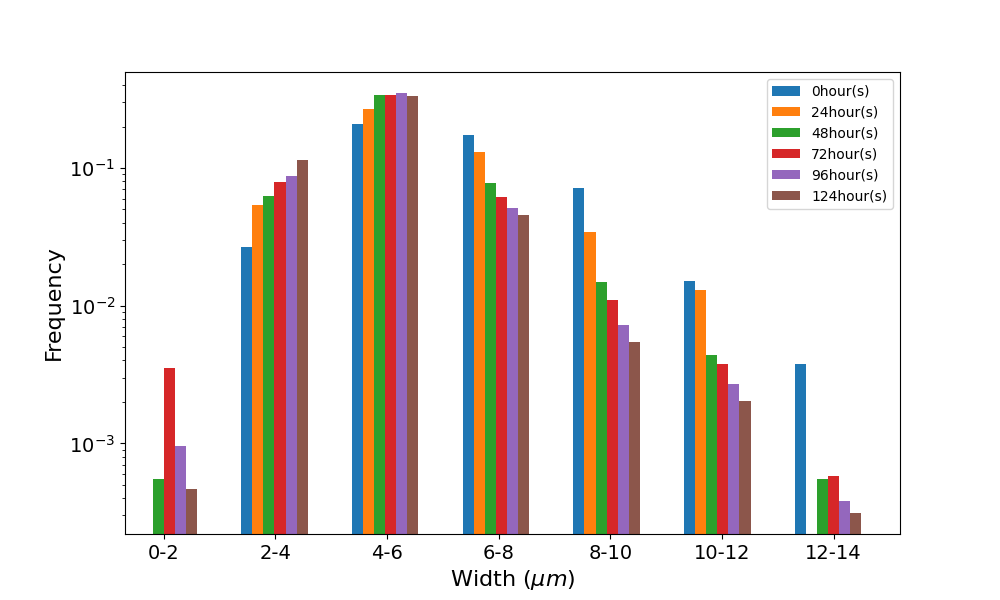

In [585]:
%matplotlib widget
plt.figure(figsize=(10,6))
count = 0
file = edge.folder.unique()[:72:12]
width = 0.2
bins = 7
boundry = 14
ticks = width*len(file)/2 
for i in file:
    count+=1
    table = edge[edge.folder == i]
    table = table[table["width_edge"] !=0]
    hist,bin_=np.histogram(table['width_edge'], bins=bins, range=[0,boundry], density=True)
    plt.bar(bin_[:-1]+count*width,hist,width=width)
plt.xticks(np.linspace(ticks+ width/2,boundry-ticks*2,bins), ['0-2', '2-4', '4-6', '6-8', '8-10',"10-12","12-14"],fontsize=14)
plt.xlabel("Width ($\mathit{\mu m}$)",fontsize=16)
plt.ylabel("Frequency",fontsize=16)
plt.yscale("log")
plt.xlim(0,14)
plt.rc('ytick', labelsize=14)
plt.legend(get_hr_list_from_folder(file))
plt.show()

In [576]:
file = edge.folder.unique()[:72:12][4]
table = edge[edge.folder == file]
table = table[table["width_edge"] >12]
# table = table[table["width_edge"] <2]
table

end   begin  tot_length_C  tot_length_straight  \
802953  123403  122004    172.078241            99.201814   
803172  115814      51    459.242829           262.488095   
804212  123393  121303   3103.758256          1794.783831   

        time_since_emergence  time_since_begin_exp  width_edge  pos_x  pos_y  \
802953              0.000000             96.983333   13.061845  22892  22775   
803172             94.983333             96.983333   12.163509  20735  24012   
804212              0.000000             96.983333   17.566154  22686  37244   

               in_ROI  component_id time_since_begin_h                 folder  \
802953  (True, False)             3    4 days 00:59:00  20220508_1959_Plate02   
803172   (True, True)             3    4 days 00:59:00  20220508_1959_Plate02   
804212   (True, True)             3    4 days 00:59:00  20220508_1959_Plate02   

                  datetime  
802953 2022-05-08 19:59:00  
803172 2022-05-08 19:59:00  
804212 2022-05-08 19:59:00

In [577]:
directory =os.path.join(dropbox,"0217extract","1045_20220504/")
update_plate_info(directory)
folder_df = get_current_folders(directory)
folder = folder_df[folder_df.folder == file]
exp = Experiment(directory)
exp.load(folder)

analysed:   0%|          | 0/44 [00:00<?, ?it/s]

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-08 19:59:00


## Check node that degree = 3. 
It might be easier to compute the ratio between main and side branches

In [2]:
dropbox = "/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai"
directory = os.path.join(dropbox,"0217extract","1045_20220504/")
update_plate_info(directory)
folder_df = get_current_folders(directory)
file_names = folder_df.folder.tolist()
file_names.sort()
file_names

analysed:   0%|          | 0/38 [00:00<?, ?it/s]

['20220504_1900_Plate02',
 '20220505_0100_Plate02',
 '20220506_0100_Plate02',
 '20220507_0147_Plate02',
 '20220508_0147_Plate02',
 '20220509_0159_Plate02',
 '20220510_0136_Plate02',
 '20220511_0007_Plate02',
 '20220512_0104_Plate02',
 '20220513_0146_Plate02',
 '20220514_0149_Plate02',
 '20220515_0149_Plate02',
 '20220516_0150_Plate02',
 '20220517_0011_Plate02',
 '20220518_0050_Plate02',
 '20220519_1410_Plate02',
 '20220520_0126_Plate02',
 '20220521_0051_Plate02',
 '20220523_1127_Plate02',
 '20220524_0134_Plate02',
 '20220525_0152_Plate02',
 '20220531_2022_Plate25',
 '20220601_0422_Plate25',
 '20220603_0028_Plate25',
 '20220607_1440_Plate25',
 '20220608_0240_Plate25',
 '20220609_0208_Plate25',
 '20220611_0008_Plate25',
 '20220612_0008_Plate25',
 '20220613_0008_Plate25',
 '20220614_0718_Plate25',
 '20220615_0524_Plate25',
 '20220616_0723_Plate25',
 '20220617_0403_Plate25',
 '20220618_0206_Plate25',
 '20220619_0506_Plate25',
 '20220620_0506_Plate25',
 '20220621_0916_Plate25']

In [3]:
f_profiles = lambda edge: extract_section_profiles_for_edge(
        exp, 0, edge, resolution=5, offset=5, step=1,target_length=120)
model = load_model(model_path,"BO_without_crop_best_model")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

In [5]:
for file in [file_names[-1]]:
    folder = folder_df[folder_df.folder == file]
    exp = Experiment(directory)
    exp.load(folder)

2022-06-21 09:16:00


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


In [4]:
def load_study_zone(exp,path_code = "/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack", ):
    loc_load = os.path.join(path_code, "pipeline", "functions", "post_processing", "default_param")
    exp.center = np.load(os.path.join(loc_load, "center.npy"))
    exp.orthog = np.load(os.path.join(loc_load, "orthog.npy"))
    exp.reach_out = np.load(os.path.join(loc_load, "reach_out.npy"))
    exp.num_trunk = np.load(os.path.join(loc_load, "num_trunk.npy"))

def get_edge_node_list_by_degree(exp,t=0,degree=3,radius=1000,dist=150):
    from amftrack.pipeline.functions.image_processing.experiment_util import get_all_nodes
    from amftrack.pipeline.functions.post_processing.util import is_in_study_zone
    import networkx as nx
    load_study_zone(exp)
    node_list = get_all_nodes(exp, t)
    G, pos = exp.nx_graph[t], exp.positions[t]
    collect = []
    for i in node_list:
        if i.degree(t) == degree:
            if sum(is_in_study_zone(i,t,radius,dist)) == 2:
                collect.append(i)
    return [G.edges(int(str(i))) for i in collect], collect

def get_widths_edges_by_degree(exp,t,edge_list,width_threshold=0,degree = 3):
    width_result = []
    edge_result = []
    for edges in edge_list:
        print(edges)
        collect_width = []
        collect_edge = []
        for node1,node2 in edges:
            edge = get_edge_from_node_labels(exp,t,node1,node2)
            if edge.width(0) > width_threshold:
                collect_width.append(edge.width(0))
                collect_edge.append(edge)
        if len(collect_width) == degree:
            collect_width.sort()
            width_result.append(collect_width)
            edge_result.append(collect_edge)
    return width_result, edge_result

In [7]:
edge_list,node_list = get_edge_node_list_by_degree(exp,dist=180)

In [8]:
width_result, edge_result = get_widths_edges_by_degree(exp,0,edge_list)

[(245420, 230792), (245420, 219867), (245420, 250900)]
[(230792, 245420), (230792, 246799), (230792, 230778)]
[(219867, 245420), (219867, 250659), (219867, 250857)]
[(250900, 245420), (250900, 250857), (250900, 230778)]
[(250659, 219867), (250659, 214411), (250659, 250652)]
[(250857, 219867), (250857, 250900), (250857, 250903)]
[(250903, 250857), (250903, 250841), (250903, 226118)]
[(214411, 250659), (214411, 250627), (214411, 244054)]
[(226118, 250903), (226118, 230778), (226118, 219901)]
[(219901, 226118), (219901, 219922), (219901, 219925)]
[(214420, 246799), (214420, 251307), (214420, 246874)]
[(244054, 214411), (244054, 250683), (244054, 250641)]
[(219922, 219901), (219922, 219925), (219922, 234324)]
[(250683, 244054), (250683, 239823), (250683, 244079)]
[(163568, 251419), (163568, 246874), (163568, 246888)]
[(234324, 219922), (234324, 246752), (234324, 224541)]
[(219488, 246708), (219488, 250523), (219488, 246718)]
[(250523, 219488), (250523, 230454), (250523, 250515)]
[(224541, 

In [11]:
mh,dh1,dh2 = [],[],[]
for i in width_result:
    mh.append(i[2]/2)
    dh1.append(i[1]/2)
    dh2.append(i[0]/2)
mh = np.array(mh)
dh1 = np.array(dh1)
dh2 = np.array(dh2)

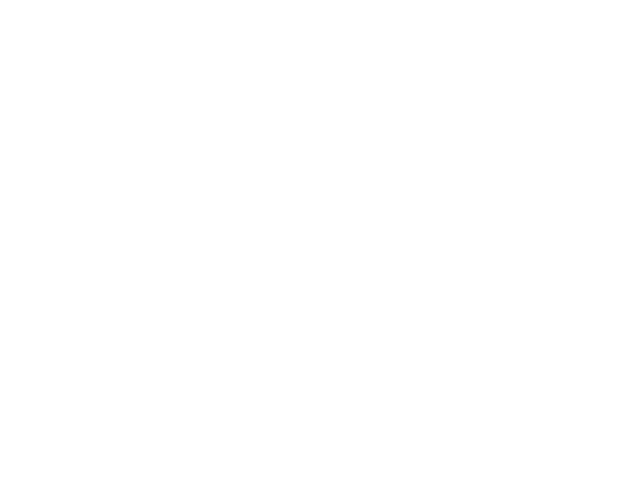

In [13]:
# mh,dh1,dh2 = [],[],[]
# for i in width_result:
#     mh.append(i[2]/2)
#     dh1.append(i[1]/2)
#     dh2.append(i[0]/2)
# mh = np.array(mh)
# dh1 = np.array(dh1)
# dh2 = np.array(dh2)
x = dh1/mh
y = dh2/mh
plt.plot(x,y,"o")
plt.xlabel("RB / RA")
plt.ylabel("RC / RA")
x.sort()
for i in range(1,10):
    plt.plot(x,(1-x**i)**(1/i),label=f'power {i}')
plt.title("Coefficient computation")
plt.legend(bbox_to_anchor=(1.03, 1),loc='upper left')
path = os.path.join(main_path,"notebook/plot_data/murray's rule",file+".png")
plt.savefig(path,bbox_inches="tight")
plt.clf()

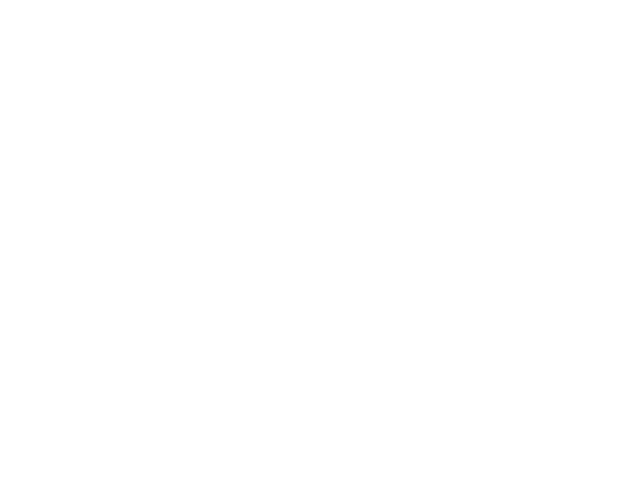

In [14]:
%matplotlib widget
plt.hist(dh2/mh,bins=20)
plt.xlabel("RC/RA")
plt.ylabel("Frequency")
path = os.path.join(main_path,"notebook/plot_data/murray's rule",file+"_hist.png")
plt.savefig(path,bbox_inches="tight")
plt.clf()

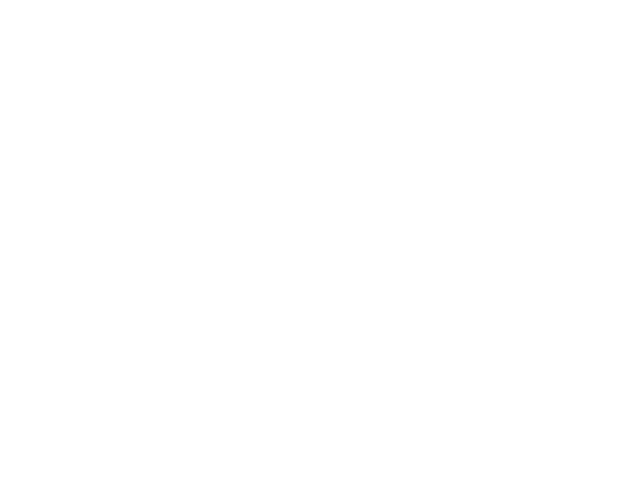

In [32]:
%matplotlib widget
plt.hist(np.log(dh2/mh),bins =25)
plt.xlabel("RC/RA")
plt.ylabel("Frequency")
plt.title("Log scale of the value")
path = os.path.join(main_path,"notebook/plot_data/murray's rule",file+"_loghist.png")
plt.savefig(path,bbox_inches="tight")
plt.clf()

## Try to find the junction that ratio is below the threshold and higher the threshold

In [17]:
ratio = dh2/mh
len(ratio)

997

In [18]:
np.where(ratio>0.9)

(array([  1,   2,   4,   6,  12,  14,  17,  21,  28,  30,  31,  41,  44,
         51,  53,  54,  58,  61,  63,  65,  68,  83,  89,  98, 102, 103,
        106, 124, 127, 129, 160, 163, 166, 172, 187, 195, 197, 217, 238,
        252, 262, 268, 274, 287, 292, 293, 301, 310, 326, 327, 337, 348,
        360, 361, 372, 376, 386, 390, 394, 402, 405, 413, 415, 417, 423,
        463, 468, 481, 492, 495, 503, 506, 508, 515, 521, 522, 524, 526,
        527, 530, 531, 558, 563, 568, 579, 580, 590, 598, 602, 607, 610,
        620, 621, 625, 636, 640, 641, 653, 659, 673, 680, 684, 688, 689,
        694, 700, 702, 737, 738, 746, 768, 774, 776, 780, 794, 801, 855,
        859, 868, 875, 915, 921, 926, 930, 937, 941, 978, 991]),)

In [19]:
edge_result[506]

[Edge(249671,249691), Edge(249691,249697), Edge(249691,249660)]

In [ ]:
# higher than 0.9
nodes=[]
for path in [249671,249691,249697,249660]:
    nodes.append(Node(path,exp))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=1,
    nodes = nodes,
    save_path = "/home/ipausers/lin/Desktop/Kai/Graduation-Project/test.png"
)

In [41]:
np.where(ratio<0.6)

(array([  8,  21,  75,  79,  80,  83,  86,  87,  88, 101, 110, 112, 118,
        123, 130, 132, 136, 137, 138, 139, 140, 141, 142, 147, 150, 152,
        154, 156, 157, 158, 159, 160, 162, 166, 168, 183, 184, 186, 192,
        196, 212, 215, 217, 226, 228, 231, 232, 235, 239, 243, 244, 245,
        248, 250, 258, 260, 264, 269, 270, 277, 286, 287, 288, 290, 293,
        299, 300, 309, 317, 321, 322, 325, 327, 335, 338, 339, 341, 343,
        346, 348, 350, 351, 352, 359, 360, 361, 362, 364, 366, 371, 384,
        392, 402, 415, 416, 421, 437, 439, 442, 447, 451, 458, 459, 460,
        464, 466, 467, 471, 472, 474, 477, 481, 484, 490, 495, 496, 501,
        509, 510, 513, 514, 517, 528, 532, 543, 547, 548, 552, 555, 556,
        557, 558, 561, 564, 567, 571, 575, 576, 577, 583, 586, 590, 595,
        600, 606, 609, 612, 626, 633, 636, 640, 643, 647, 650, 655, 660,
        667, 668, 669, 673, 674, 677, 680, 682, 683, 689, 691, 693, 694,
        695, 698, 714, 734, 744, 749, 750, 753, 757

In [43]:
edge_result[571]

[Edge(217353,249011), Edge(248991,249011), Edge(249011,144989)]

Experiment(/run/user/357100579/gvfs/smb-share:server=sun.amolf.nl,share=shimizu-data/home-folder/Kaikai/0217extract/1045_20220504/)

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-06-21 09:16:00


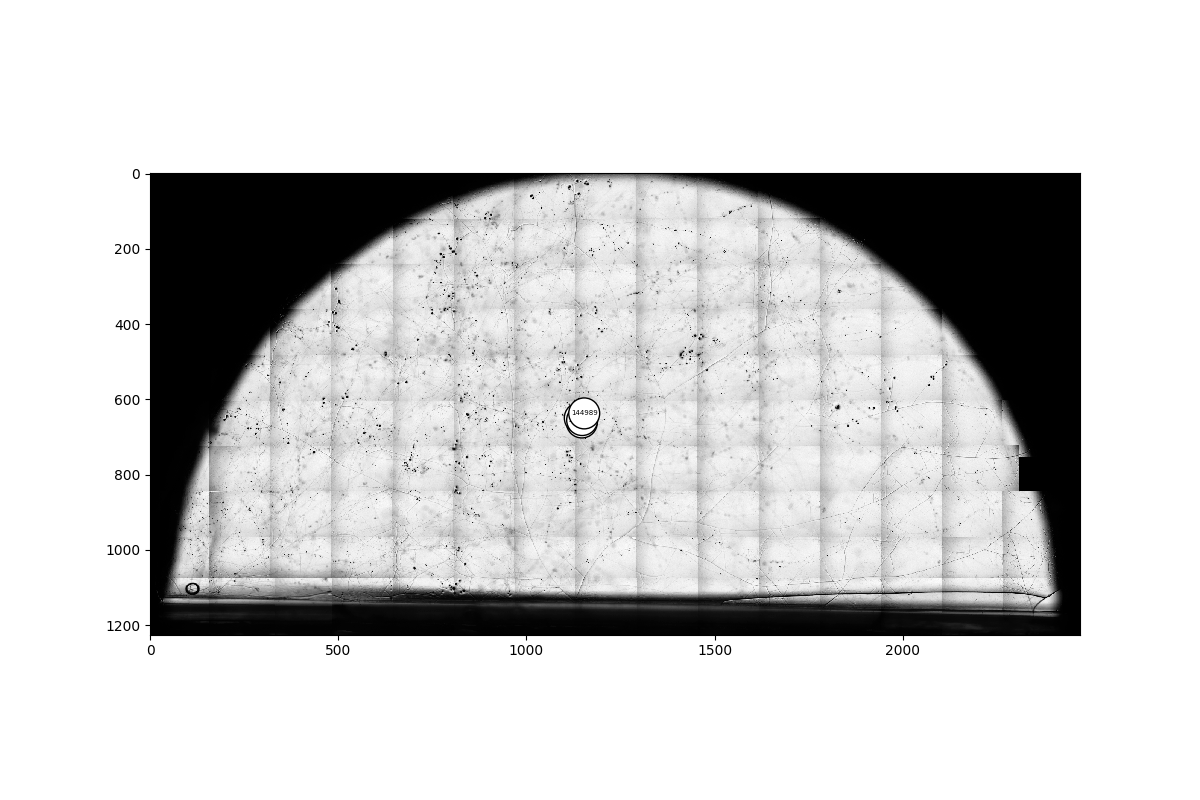

In [45]:
# lower than 0.6
nodes = []
for path in [217353,248991,249011,144989]:
    nodes.append(Node(path,exp))
%matplotlib widget
plot_full_image_with_features(
    exp,
    t=0,
    downsizing=1,
    nodes = nodes,
    
)

In [ ]:
for file in file_names[13:]:
    folder = folder_df[folder_df.folder == file]   
    exp = Experiment(directory)
    exp.load(folder)
    edge_list,node_list = get_edge_node_list_by_degree(exp,dist=200)
    width_result, edge_result = get_widths_edges_by_degree(exp,0,edge_list)
    mh,dh1,dh2 =[],[],[]
    for i in width_result:
        i.sort()
        mh.append(i[2])
        dh1.append(i[1])
        dh2.append(i[0])
    mh = np.array(mh)
    dh1 = np.array(dh1)
    dh2 = np.array(dh2)
    x = dh1/mh
    y = dh2/mh
    plt.plot(x,y,"o")
    plt.xlabel("RB / RA")
    plt.ylabel("RC / RA")
    x.sort()
    for i in range(1,10):
        plt.plot(x,(1-x**i)**(1/i),label=f'power {i}')
    plt.title("Coefficient computation")
    path = os.path.join(main_path,"notebook/plot_data/murray's rule",file+".png")
    plt.savefig(path,bbox_inches="tight")
    plt.clf()
    plt.hist(np.log(dh2/mh),bins=25)
    plt.xlabel("RC/RA")
    plt.ylabel("Frequency")
    path = os.path.join(main_path,"notebook/plot_data/murray's rule",file+"_loghist.png")
    plt.savefig(path,bbox_inches="tight")
    plt.clf()
    plt.hist(dh2/mh,bins=25)
    plt.xlabel("RC/RA")
    plt.ylabel("Frequency")
    path = os.path.join(main_path,"notebook/plot_data/murray's rule",file+"_hist.png")
    plt.savefig(path,bbox_inches="tight")
    plt.clf()
    del exp

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-17 00:11:00
[(262376, 258518), (262376, 17071), (262376, 261671)]
[(19970, 262370), (19970, 28582), (19970, 17071)]
[(263358, 263360), (263358, 265286), (263358, 262379)]
[(28582, 19970), (28582, 23354), (28582, 28581)]
[(17071, 262376), (17071, 19970), (17071, 263668)]
[(263668, 17071), (263668, 23354), (263668, 263332)]
[(23354, 28582), (23354, 263668), (23354, 28583)]
[(28581, 28582), (28581, 27879), (28581, 28583)]
[(27879, 28581), (27879, 27878), (27879, 27057)]
[(28583, 23354), (28583, 28581), (28583, 27057)]
[(261671, 262376), (261671, 262379), (261671, 263332)]
[(263332, 263668), (263332, 261671), (263332, 262381)]
[(21964, 24030), (21964, 27870), (21964, 27871)]
[(27873, 27870), (27873, 27876), (27873, 27871)]
[(25578, 25576), (25578, 263689), (25578, 279508)]
[(27876, 27873), (27876, 28578), (27876, 23348)]
[(27871, 21964), (27871, 27873), (27871, 27872)]
[(27878, 27879), (27878, 28578), (27878, 27880)]
[(27057, 27879), (27057, 28583), (27057, 27880)]
[(28578, 27876),

/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-18 00:50:00
[(42782, 40486), (42782, 42780), (42782, 41633)]
[(41671, 41675), (41671, 41633), (41671, 39300)]
[(42750, 41605), (42750, 41620), (42750, 42740)]
[(42780, 42782), (42780, 42781), (42780, 40480)]
[(41633, 42782), (41633, 41671), (41633, 42781)]
[(42781, 42780), (42781, 41633), (42781, 40489)]
[(41628, 40480), (41628, 42773), (41628, 42771)]
[(42810, 39300), (42810, 42813), (42810, 39256)]
[(41620, 42750), (41620, 32412), (41620, 41623)]
[(42740, 42750), (42740, 32429), (42740, 42752)]
[(42773, 41628), (42773, 42771), (42773, 42775)]
[(42771, 41628), (42771, 42773), (42771, 42772)]
[(42775, 42773), (42775, 42772), (42775, 42778)]
[(42772, 42771), (42772, 42775), (42772, 42770)]
[(42778, 42775), (42778, 42777), (42778, 41632)]
[(42777, 42778), (42777, 42770), (42777, 41632)]
[(41632, 42778), (41632, 42777), (41632, 40489)]
[(42768, 42770), (42768, 40489), (42768, 41629)]
[(39271, 39256), (39271, 39257), (39271, 40488)]
[(39307, 39256), (39307, 39257), (39307, 39322)]


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-19 14:10:00
[(56106, 54329), (56106, 54344), (56106, 56104)]
[(54344, 56106), (54344, 56116), (54344, 56104)]
[(56104, 56106), (56104, 50300), (56104, 54344)]
[(56116, 54344), (56116, 54383), (56116, 56121)]
[(41671, 44105), (41671, 42782), (41671, 49003)]
[(43976, 50300), (43976, 43967), (43976, 56121)]
[(54462, 50344), (54462, 54470), (54462, 54465)]
[(54483, 42782), (54483, 54470), (54483, 40489)]
[(54615, 54619), (54615, 49003), (54615, 39256)]
[(54301, 43967), (54301, 54296), (54301, 56070)]
[(43967, 43976), (43967, 54301), (43967, 54296)]
[(54470, 54462), (54470, 54483), (54470, 44033)]
[(54465, 54462), (54465, 44033), (54465, 54469)]
[(54296, 54301), (54296, 43967), (54296, 32429)]
[(42750, 56121), (42750, 41620), (42750, 43997)]
[(41620, 42750), (41620, 32412), (41620, 41623)]
[(44033, 54470), (44033, 54465), (44033, 54469)]
[(54469, 54465), (54469, 44033), (54469, 42775)]
[(42775, 54469), (42775, 42777), (42775, 42770)]
[(32429, 54296), (32429, 56076), (32429, 54292)]


/home/ipausers/lin/Desktop/AMF/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-20 01:26:00
[(41671, 44105), (41671, 42782), (41671, 60905)]
[(42775, 50344), (42775, 42777), (42775, 42770)]
[(54615, 59316), (54615, 60905), (54615, 39256)]
[(54301, 63812), (54301, 43967), (54301, 54296)]
[(56112, 43967), (56112, 42750), (56112, 43988)]
[(43967, 54301), (43967, 56112), (43967, 54296)]
[(54296, 54301), (54296, 43967), (54296, 32429)]
[(42750, 56112), (42750, 43997), (42750, 41620)]
[(41620, 42750), (41620, 32412), (41620, 41623)]
[(63818, 62152), (63818, 32429), (63818, 63800)]
[(32429, 54296), (32429, 63818), (32429, 54292)]
[(43997, 42750), (43997, 44001), (43997, 43988)]
[(54292, 32429), (54292, 63826), (54292, 59169)]
[(42777, 42775), (42777, 42770), (42777, 40489)]
[(62309, 63995), (62309, 40489), (62309, 39256)]
[(63826, 54292), (63826, 63814), (63826, 59123)]
[(59169, 54292), (59169, 42740), (59169, 54285)]
[(42768, 42770), (42768, 40489), (42768, 63977)]
[(44001, 43997), (44001, 43989), (44001, 42752)]
[(42740, 59169), (42740, 43988), (42740, 43989)]


In [593]:
from models.data_prepare import data
X,y = data("combine_width_train")
y.shape

(2543, 1, 1)

In [597]:
y = y.reshape(-1)

In [610]:
np.min(y), np.max(y)

(0.0, 17.09225057521464)

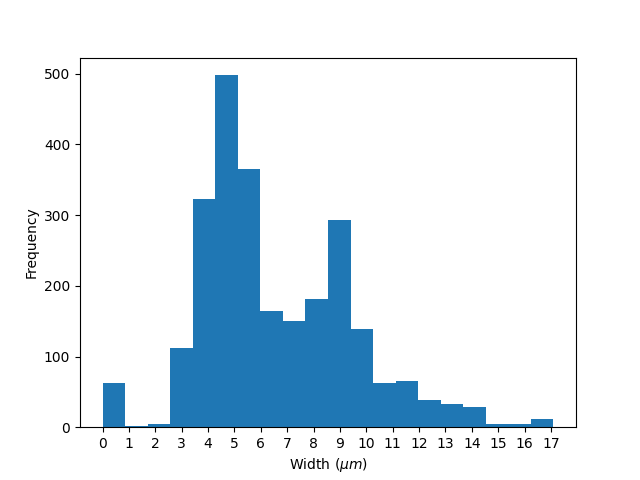

In [619]:
plt.clf()
%matplotlib widget
plt.hist(y,bins=20)
plt.xticks(range(int(np.min(y)), int(np.max(y)+1)),fontsize=10)
plt.yticks(fontsize=10)
plt.xlabel("Width ($\mu m$)",)
plt.ylabel("Frequency")
plt.show()

# Useful code

In [55]:
def get_width_from_exp(exp,t=0):
    width_dict = get_width_info_new(exp, t, resolution=50)
    collect = []
    for _, width in width_dict.items():
        if width != 0:
            collect.append(width)
    return collect

def get_width_hist(collect,save_width_path,file,save=True):
    plt.hist(collect,color='blue')
    plt.xlabel('Width ($\mathit{\mu m}$)')
    plt.ylabel("Frequency")
    plt.ylim(0,100)
    plt.xlim(2,17)
    if save == True:
        plt.savefig(fname= save_width_path+file+".png")
        plt.clf()
    else:
        plt.show()

def get_width_hist_combine(exp,t,save_width_path,file,save=True):
    collect = get_width_from_exp(exp,t=t)
    get_width_hist(collect,save_width_path,file,save=save)
    return f'finish {file}'

In [1]:
## by log scale and width / total length
import os
import pandas as pd
def get_edge_width_from_analysis(analysis_path):
    path_time_edge = os.path.join(analysis_path, "time_edge_info")
    path_save = os.path.join(analysis_path, "folder_info.json")
    folders_plate = pd.read_json(path_save)
    folders_plate = folders_plate.reset_index()
    folders_plate = folders_plate.sort_values("datetime")
    json_paths = os.listdir(path_time_edge)
    tables = []
    for path in json_paths:
        try:
            index = int(path.split("_")[-1].split(".")[0])
            line = folders_plate.iloc[index]
            table = pd.read_json(os.path.join(path_time_edge, path))
        except:
            print(os.path.join(path_time_edge, path))
            continue
        table = table.transpose()
        table = table.fillna(-1)
        table["time_since_begin_h"] = (line["datetime"] - folders_plate["datetime"].iloc[0])
        table["folder"] = line["folder"]
        table["datetime"] = line["datetime"]
        tables.append(table)
    time_edge_info_plate = pd.concat(tables, axis=0, ignore_index=True)
    time_edge_info_plate.reset_index(inplace=True, drop=True)
    return time_edge_info_plate
analysis_path = "/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2"
edge_table = get_edge_width_from_analysis(analysis_path)
edge = edge_table.sort_values("datetime")

/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_20.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_77.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_98.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_109.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_61.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_36.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_148.json
/Volumes/ADATA HD700/Mac/thesisdata/1045_20220504/Analysis_1045_20220504_200_Version1 2/time_edge_info/._edge_info_133.json
/Volumes/ADAT

In [4]:
edge.folder.unique()[:72:12]

array(['20220504_1900_Plate02', '20220505_1900_Plate02',
       '20220506_1900_Plate02', '20220507_1947_Plate02',
       '20220508_1959_Plate02', '20220509_2336_Plate02'], dtype=object)

In [9]:
file = edge.folder.unique()[:72:12]
def get_hr_list_from_folder(folder_list):
    from datetime import datetime
    date_list = ["".join(os.path.splitext(path)[0].split("/")[-1].split("_")[:2]) for path in folder_list]
    datetime_list = [datetime.strptime(date, '%Y%m%d%H%M') for date in date_list]
    diff_list = [(date - datetime_list[0]) for date in datetime_list]
    hr_list = [str(hr.seconds//3600+hr.days*24) + "hour(s)" for hr in diff_list] 
    return hr_list
get_hr_list_from_folder(file)

['0hour(s)', '24hour(s)', '48hour(s)', '72hour(s)', '96hour(s)', '124hour(s)']

In [10]:
get_hr_list_from_folder(file)

['0hour(s)', '24hour(s)', '48hour(s)', '72hour(s)', '96hour(s)', '124hour(s)']

In [11]:
edge

end   begin  tot_length_C  tot_length_straight  \
863609      38      36     90.169260            34.014703   
863493     224     209    171.614787            99.045444   
863492     209     135    281.690831           153.587109   
863491     223     135     88.072988            44.407207   
863490     223     209    232.158818           124.036285   
...        ...     ...           ...                  ...   
577421  115044  115043    275.822276           158.202402   
577422  115043  111625    252.204939           145.165423   
577423   69021   67361    206.181067           118.152444   
577425  115399   69240    357.653724           205.548048   
584623  114739  100723     61.374366            33.241540   

        time_since_emergence  time_since_begin_exp  width_edge  pos_x  pos_y  \
863609              0.000000              0.000000    0.000000  19623  20088   
863493              0.000000              0.000000    6.441779  23710   7772   
863492              0.000000              0.000000    8.664598  23707   7673   
863491              0.000000              0.000000    0.000000  23710   7549   
863490              0.000000              0.000000    7.542412  23710   7549   
...                      ...                   ...         ...    ...    ...   
577421              0.000000            468.566667    3.990638  19865   5722   
577422              0.000000            468.566667    5.369108  19857   5564   
577423             96.133333            468.566667    4.713288  20047   5806   
577425              0.000000            468.566667    3.256586  21568   5767   
584623              0.000000            468.566667    0.000000   4599  32043   

               in_ROI  component_id time_since_begin_h                 folder  \
863609   (True, True)             4    0 days 00:00:00  20220504_1900_Plate02   
863493  (True, False)             0    0 days 00:00:00  20220504_1900_Plate02   
863492  (True, False)             0    0 days 00:00:00  20220504_1900_Plate02   
863491  (True, False)             0    0 days 00:00:00  20220504_1900_Plate02   
863490  (True, False)             0    0 days 00:00:00  20220504_1900_Plate02   
...               ...           ...                ...                    ...   
577421   (True, True)             0   19 days 12:34:00  20220524_0734_Plate02   
577422   (True, True)             0   19 days 12:34:00  20220524_0734_Plate02   
577423   (True, True)             0   19 days 12:34:00  20220524_0734_Plate02   
577425  (True, False)             0   19 days 12:34:00  20220524_0734_Plate02   
584623   (True, True)             0   19 days 12:34:00  20220524_0734_Plate02   

                  datetime  
863609 2022-05-04 19:00:00  
863493 2022-05-04 19:00:00  
863492 2022-05-04 19:00:00  
863491 2022-05-04 19:00:00  
863490 2022-05-04 19:00:00  
...                    ...  
577421 2022-05-24 07:34:00  
577422 2022-05-24 07:34:00  
577423 2022-05-24 07:34:00  
577425 2022-05-24 07:34:00  
584623 2022-05-24 07:34:00  

[982125 rows x 14 columns]

In [2]:
import os
import pandas as pd
import sys
sys.path.append("/Users/kai/Downloads/graduation/final_git/MasterThesis/src")
from config import *
df = pd.read_excel(os.path.join(labelme_path,"Fluorescence_ex_Kai-kai_Plate521.xlsx"),engine = "openpyxl",sheet_name="PrinceData0113",index_col=0)

analysed:   0%|          | 0/267 [00:00<?, ?it/s]

In [3]:
get_slices_from_node

/Users/kai/Downloads/graduation/AMFtrack/amftrack/util/dbx.py:3: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [4]:
from make_dataset import *

directory = "/Users/kai/Downloads/"
update_plate_info(directory)
folder_df = get_current_folders(directory)
select = folder_df[(folder_df["Plate"] == "521") & (folder_df["folder"] =="20230113_0949_Plate02")]
exp = Experiment(directory)
exp.load(select, suffix="")
exp.load_tile_information(0)

analysed:   0%|          | 0/267 [00:00<?, ?it/s]

/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2023-01-13 09:49:00


In [33]:
a,b = get_slices_dict(df,exp,target_length=120,output_type="data")

pos15  will not be processed!


In [35]:
a

{'pos1': array([[179., 179., 179., ..., 181., 183., 182.],
        [178., 177., 175., ..., 183., 183., 181.],
        [179., 180., 180., ..., 178., 177., 175.],
        ...,
        [179., 182., 183., ..., 173., 171., 173.],
        [178., 176., 176., ..., 174., 177., 173.],
        [176., 175., 179., ..., 175., 175., 173.]]),
 'pos2': array([[187., 188., 187., ..., 129., 133., 136.],
        [189., 187., 186., ..., 182., 179., 181.],
        [187., 187., 183., ..., 142., 141., 140.],
        ...,
        [180., 181., 180., ..., 179., 180., 182.],
        [178., 177., 178., ..., 182., 182., 181.],
        [145., 147., 147., ..., 165., 166., 169.]]),
 'pos3': array([[192., 193., 191., ..., 166., 167., 170.],
        [187., 186., 186., ..., 180., 181., 181.],
        [184., 185., 184., ..., 188., 186., 186.],
        ...,
        [184., 180., 178., ..., 193., 195., 192.],
        [191., 194., 194., ..., 183., 187., 184.],
        [186., 187., 187., ..., 140., 138., 139.]]),
 'pos4': arra

In [5]:
folder_df

total_path Plate PrincePos      root  \
0  /Users/kai/Downloads/20220516_1611_Plate02  1045         2  'Carrot'   
1  /Users/kai/Downloads/20230111_1349_Plate02   521         2  'Carrot'   
2  /Users/kai/Downloads/20220515_0949_Plate02  1045         2  'Carrot'   
3  /Users/kai/Downloads/20220621_0916_Plate25  1045        25  'Carrot'   
4  /Users/kai/Downloads/20230113_0949_Plate02   521         2  'Carrot'   
5  /Users/kai/Downloads/20220516_2211_Plate02  1045         2  'Carrot'   
6  /Users/kai/Downloads/20220512_0304_Plate02  1045         2  'Carrot'   
7  /Users/kai/Downloads/20230109_1409_Plate02   521         2  'Carrot'   

  strain          medium split Pbait CrossDate Temperature  ...  \
0   'C2'  '001P100N200C'   'Y'   '-'  20220504          25  ...   
1   'C2'  '001P100N100C'   'Y'   '-'  20230104          25  ...   
2   'C2'  '001P100N200C'   'Y'   '-'  20220504          25  ...   
3   'C2'  '001P100N200C'   'Y'   '-'  20220504          25  ...   
4   'C2'  '001P100N100C'   'Y'   '-'  20230104          25  ...   
5   'C2'  '001P100N200C'   'Y'   '-'  20220504          25  ...   
6   'C2'  '001P100N200C'   'Y'   '-'  20220504          25  ...   
7   'C2'  '001P100N100C'   'Y'   '-'  20230104          25  ...   

  /Analysis/transform.mat /Analysis/transform_corrupt.mat  \
0                    True                           False   
1                    True                           False   
2                    True                           False   
3                    True                           False   
4                    True                           False   
5                    True                           False   
6                    True                           False   
7                    True                           False   

  /Analysis/skeleton_realigned_compressed.mat /Analysis/nx_graph_pruned.p  \
0                                        True                        True   
1                                        True                        True   
2                                        True                        True   
3                                        True                        True   
4                                        True                        True   
5                                        True                        True   
6                                        True                        True   
7                                        True                        True   

  /Analysis/nx_graph_pruned_width.p /Analysis/nx_graph_pruned_labeled.p  \
0                              True                                True   
1                              True                                True   
2                              True                                True   
3                              True                                True   
4                              True                                True   
5                              True                                True   
6                              True                                True   
7                              True                                True   

                 date                 folder      unique_id  \
0  16.05.2022, 16:11:  20220516_1611_Plate02  1045_20220504   
1  11.01.2023, 13:49:  20230111_1349_Plate02   521_20230104   
2  15.05.2022, 09:49:  20220515_0949_Plate02  1045_20220504   
3  21.06.2022, 09:16:  20220621_0916_Plate25  1045_20220504   
4  13.01.2023, 09:49:  20230113_0949_Plate02   521_20230104   
5  16.05.2022, 22:11:  20220516_2211_Plate02  1045_20220504   
6  12.05.2022, 03:04:  20220512_0304_Plate02  1045_20220504   
7  09.01.2023, 14:09:  20230109_1409_Plate02   521_20230104   

             datetime  
0 2022-05-16 16:11:00  
1 2023-01-11 13:49:00  
2 2022-05-15 09:49:00  
3 2022-06-21 09:16:00  
4 2023-01-13 09:49:00  
5 2022-05-16 22:11:00  
6 2022-05-12 03:04:00  
7 2023-01-09 14:09:00  

[8 rows x 24 columns]

/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-12 03:04:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-12 03:04:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-15 09:49:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-15 09:49:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-16 16:11:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-16 16:11:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-16 22:11:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-16 22:11:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-06-21 09:16:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-06-21 09:16:00


NetworkXError: nbunch is not a node or a sequence of nodes.

In [19]:
def get_edge_from_node(index,select,node_dict,node,exp):
    exp.load(select)
    exp.load_tile_information(0)
    t = 0
    G, pos = exp.nx_graph[t], exp.positions[t]
    node_dict[index] = list(G.edges(node))[0]
    return node_dict
def get_slices_from_node(index,slice_dict,node_dict,exp,target_length=120):
    node1, node2 = node_dict[index]
    f_profiles = lambda edge: extract_section_profiles_for_edge(exp, 0, edge, resolution=5, offset=4, step=3,target_length=target_length)
    slices, coords1, coords2 = f_profiles(get_edge_from_node_labels(exp, 0, node1,node2))
    slice_dict[index] = slices
    return slice_dict
def get_width_from_slices(index,model,slice_dict,width_dict):
    predict_value = model.predict(slice_dict[index],verbose=0)
    width_dict[index] = predict_value
    return width_dict

In [57]:
from video import *
from model import *

In [60]:
node_dict, slice_dict,width_dict,median_index_dict= {}, {}, {}, {}
model = load_model(model_path,"default_CNN_model")
for index in range(len(file_names)-1):
    exp = Experiment(directory)
    select = folder_df[(folder_df["folder"] == file_names[index])]
    exp.load(select)
    exp.load_tile_information(0)
    get_edge_from_node(index,node_dict,51,exp)
    get_slices_from_node(index,slice_dict,node_dict,exp,target_length=120)
    get_width_from_slices(index,model,slice_dict,width_dict)
    get_median_index_from_width(index,width_dict,median_index_dict)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 120, 1)            0         
                                                                 
 conv_1 (Conv1D)             (None, 101, 128)          2688      
                                                                 
 conv_2 (Conv1D)             (None, 91, 128)           180352    
                                                                 
 batch_normalization (BatchN  (None, 91, 128)          512       
 ormalization)                                                   
                                                                 
 dropout (Dropout)           (None, 91, 128)           0         
                                                                 
 flatten (Flatten)           (None, 11648)             0         
                                                        

/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(
/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-15 09:49:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-16 16:11:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-05-16 22:11:00


/Users/kai/Downloads/graduation/AMFtrack/amftrack/pipeline/functions/image_processing/experiment_class_surf.py:103: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.folders["datetime"] = pd.to_datetime(


2022-06-21 09:16:00


NetworkXError: nbunch is not a node or a sequence of nodes.

In [63]:
def get_median_index_from_width(index,width_dict,median_index_dict):
    """
    Use to extract the index of the median width from width
    
    index             : int, to select the width from width dict and save into the median index dict
    width_dict        : dict, the dict for extract the width from different time point
    median_index_dict : dict, the dict for collect the median index
    
    return            : dict, the dict with index as key and median index of the width as value.
    """
    width = width_dict[index]
    median = np.median(width)
    print("test")
    # if median > 1e5:
    #     median = np.median(np.delete(width, np.where(width == median)))
    median_index = np.where(width == median)[0]
    if len(median_index) == 0:
        median_index = (np.abs(width - median)).argmin()
    else:
        median_index = median_index[0]
    median_index_dict[index] = median_index
    width_dict[index] = median
    return width_dict, median_index_dict

In [64]:
get_median_index_from_width(3,width_dict,median_index_dict)

test


({0: 13.015282, 1: 13.201307, 2: 13.948698, 3: 13.871986},
 {0: 7, 1: 25, 2: 20, 3: 0})

In [66]:
median_slice_dict = {}
get_slice_from_median_index(3,median_index_dict,slice_dict,median_slice_dict)

(0,
 {3: array([207., 205., 204., 205., 207., 203., 205., 200., 202., 204., 201.,
         200., 201., 201., 201., 200., 201., 199., 201., 200., 196., 197.,
         198., 198., 198., 196., 195., 193., 190., 190., 188., 184., 183.,
         176., 174., 172., 165., 161., 156., 153., 148., 142., 137., 138.,
         138., 135., 126., 125., 120., 116., 118., 108.,  97.,  97.,  99.,
          90.,  92., 105., 109., 107., 105., 107., 109., 106.,  97.,  82.,
          67.,  63.,  70.,  85., 103., 114., 113., 100.,  84.,  72.,  72.,
          84., 103., 117., 125., 130., 137., 143., 148., 150., 158., 161.,
         167., 170., 176., 177., 179., 182., 187., 187., 191., 192., 193.,
         192., 191., 193., 199., 200., 202., 200., 198., 200., 202., 202.,
         202., 203., 203., 201., 200., 199., 201., 204., 203., 202.])})